# Compare vaccination strategies. $e$=0.95

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import datetime
from experiments import get_experiments_results
from env_var import EPIDEMIC, MAPPINGS, EXPERIMENTS

mpl.rcParams['figure.dpi']= 175
plt.style.use('ggplot')

In [2]:
# Simulation parameters
num_age_groups = EXPERIMENTS['num_age_groups']
num_ervas = EXPERIMENTS['num_ervas']
T = EXPERIMENTS['simulate_T']
init_vacc = EXPERIMENTS['init_vacc']
u = EXPERIMENTS['vaccines_per_day']
r_experiments = EXPERIMENTS['r_effs']
t0 = EXPERIMENTS['t0']

# Plot parameters
plot_interval = 15
ervas_labels = EPIDEMIC['ervas_order']
age_labels = MAPPINGS['age_groups'][num_age_groups]['names']
e = 0.95

strategies = [
    ('equal', EPIDEMIC['ws_vacc'], 'Pop only'),
    ('no_vacc', EPIDEMIC['ws_vacc'], 'No vaccination'),
    ('thl', EPIDEMIC['ws_vacc'], 'Pop, Inf and Hosp'),
    ('thl', [1/2, 1/2, 0], 'Pop and Hosp'),
    ('thl', [1/2, 0, 1/2], 'Pop and Inf'),
    ('thl', [0, 1/2, 1/2], 'Hosp and Inf'),
    ('thl', [0, 1, 0], 'Hosp only'),
    ('thl', [0, 0, 1], 'Inf only'),
]

In [3]:
all_results = get_experiments_results(num_age_groups=num_age_groups,
                                      num_ervas=num_ervas,
                                      init_vacc=True,
                                      strategies=strategies,
                                      u=u,
                                      T=T,
                                      r_experiments=r_experiments,
                                      t0=t0,
                                      e=e)

Beginning experiments.
Parameters:
Number of age ervas: 5.
Number of age groups: 9.
Number of vaccines per day: 30000.
rho: 42.30095393674314.
t0: 2021-04-18.
T: 115.
Vaccine efficacy (e): 0.95.
Rs to try: [1.0, 1.25, 1.5, 2.0].
Initialize with vaccinated people: True.
Strategies:
[('equal', [0.3333333333333333, 0.3333333333333333, 0.3333333333333333], 'Pop only'), ('no_vacc', [0.3333333333333333, 0.3333333333333333, 0.3333333333333333], 'No vaccination'), ('thl', [0.3333333333333333, 0.3333333333333333, 0.3333333333333333], 'Pop, Inf and Hosp'), ('thl', [0.5, 0.5, 0], 'Pop and Hosp'), ('thl', [0.5, 0, 0.5], 'Pop and Inf'), ('thl', [0, 0.5, 0.5], 'Hosp and Inf'), ('thl', [0, 1, 0], 'Hosp only'), ('thl', [0, 0, 1], 'Inf only')].

Finished R: 1.0. Beta: 0.023640128813534566 1/4. Policy: Pop only. 1/8
Finished R: 1.0. Beta: 0.023640128813534566 1/4. Policy: No vaccination. 2/8
Finished R: 1.0. Beta: 0.023640128813534566 1/4. Policy: Pop, Inf and Hosp. 3/8
Finished R: 1.0. Beta: 0.02364012

In [4]:
def plot_results(ax, r, metric, all_results, t0, T, skip_no_vacc=True):
    begin = datetime.datetime.strptime(t0, '%Y-%m-%d')
    x = [begin + datetime.timedelta(days=day) for day in range(T)]

    results_for_r = all_results[r]
    totals = []
    for label, results_all_metrics in results_for_r:
        if label == 'No vaccination' and skip_no_vacc:
            continue
        metric_results = results_all_metrics[metric]
        metric_all_time = metric_results.sum(axis=0)
        metric_all_time = metric_all_time.sum(axis=0)
        
        assert metric_all_time.shape[0] == T
        
        ax.plot(x, metric_all_time, label=label)
        if metric == 'deaths':
            total_policy = metric_all_time[-1]
        else:
            total_policy = metric_all_time.sum(axis=0)
        total = (label, total_policy)
        totals.append(total)
        
    sorted_totals = sorted(totals, key=lambda x: x[-1])
    for total in sorted_totals:
        print('%s: %s' % (total[0], total[1]))
        
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of %s.' % (metric, ))
    ax.set_title('Number of %s per policy. R=%s' % (metric, r))
    ax.legend()
        
    return ax

# Deaths

Pop and Inf: 78.35553002513689
Pop and Hosp: 78.37791723271224
Pop, Inf and Hosp: 78.39299927241343
Pop only: 78.42046213173198
Hosp and Inf: 78.53898070944211
Inf only: 78.54941149522956
Hosp only: 78.5546957850712


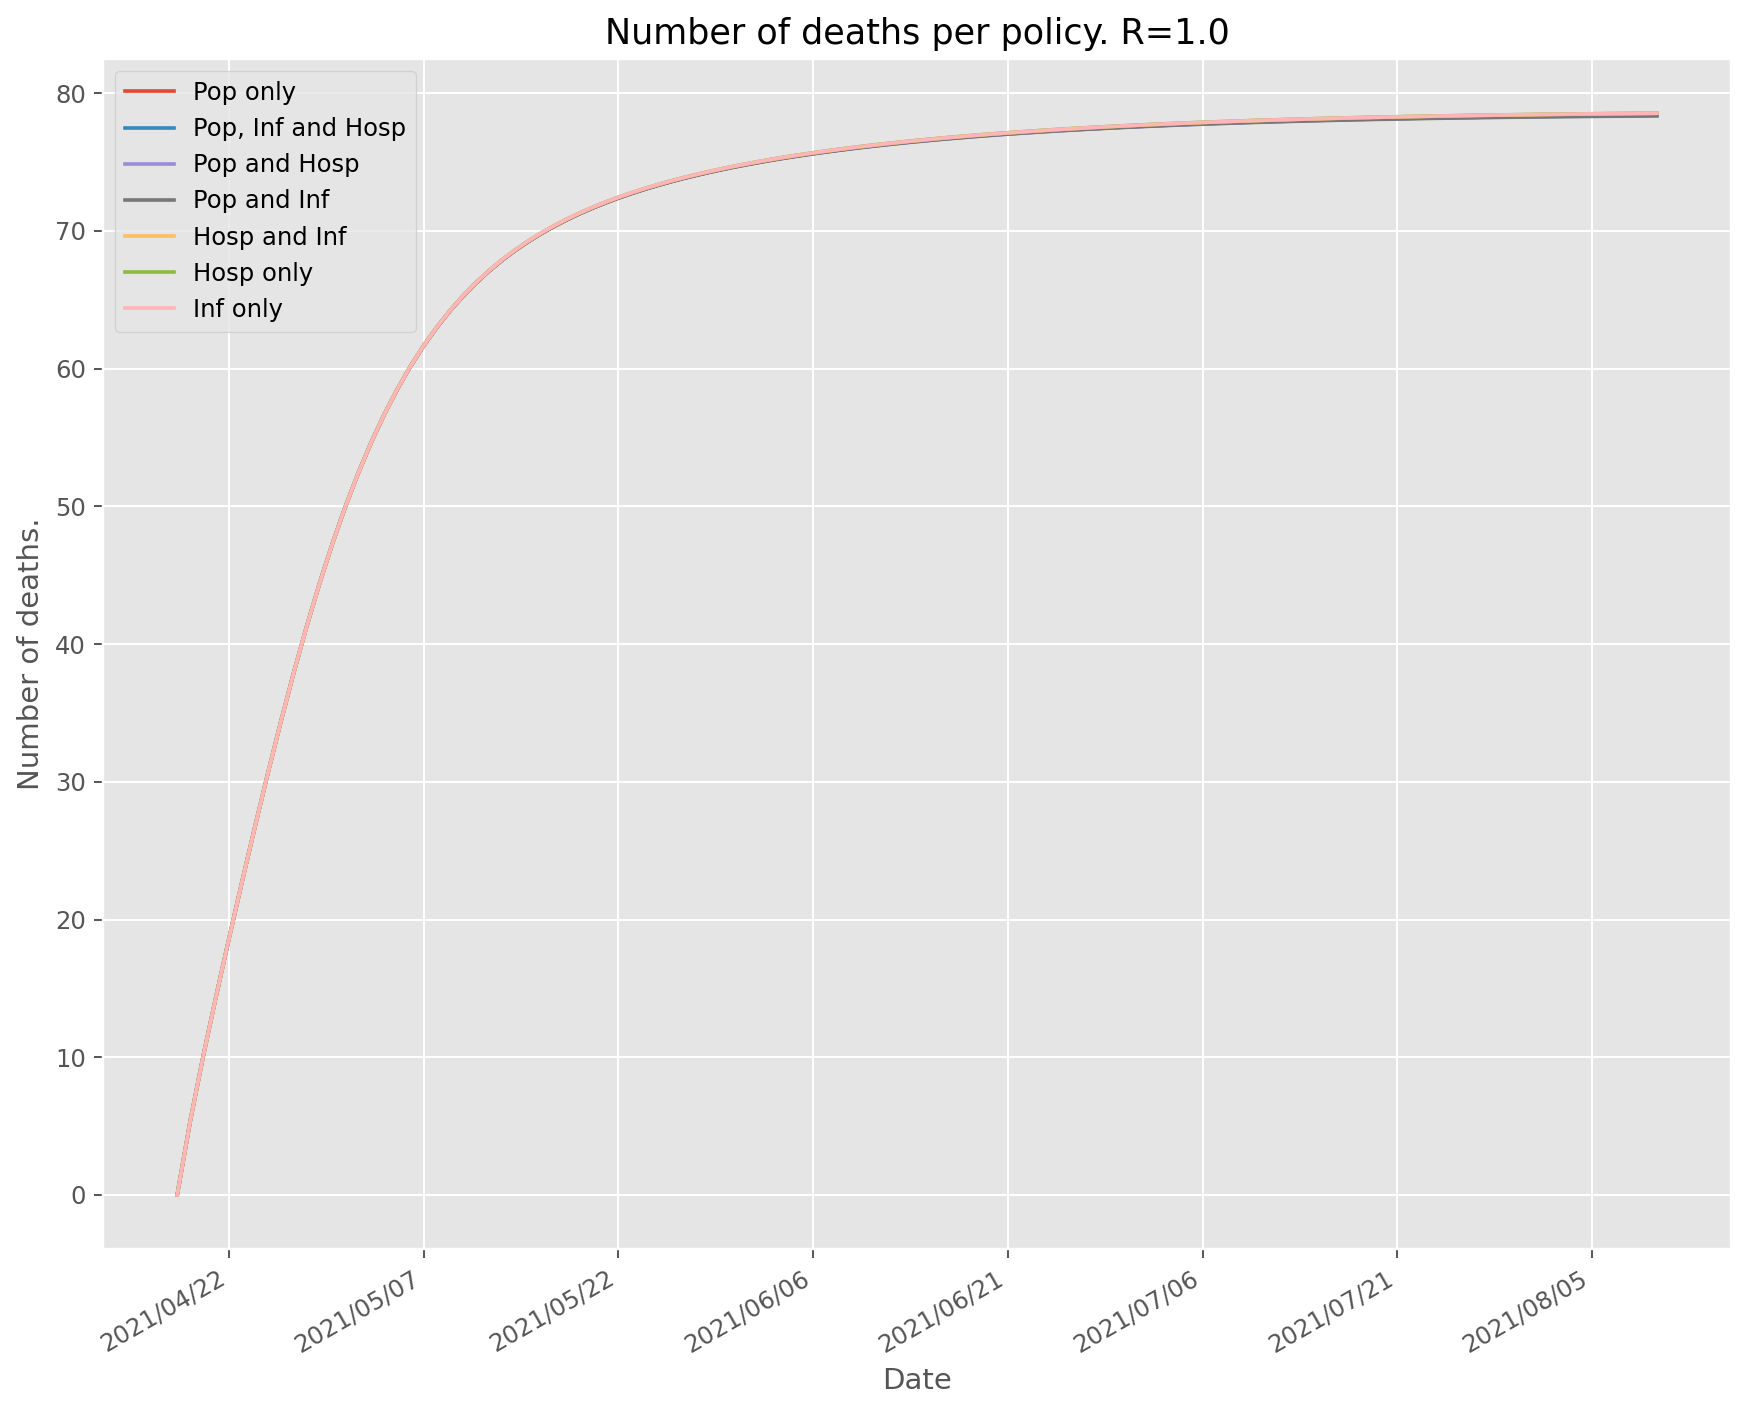

In [5]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 98.84499734386443
Pop and Inf: 98.85343510698821
Pop and Hosp: 98.94584027671907
Pop, Inf and Hosp: 99.16128735762771
Hosp and Inf: 100.12154701857241
Hosp only: 100.14192169366223
Inf only: 100.1859324228694


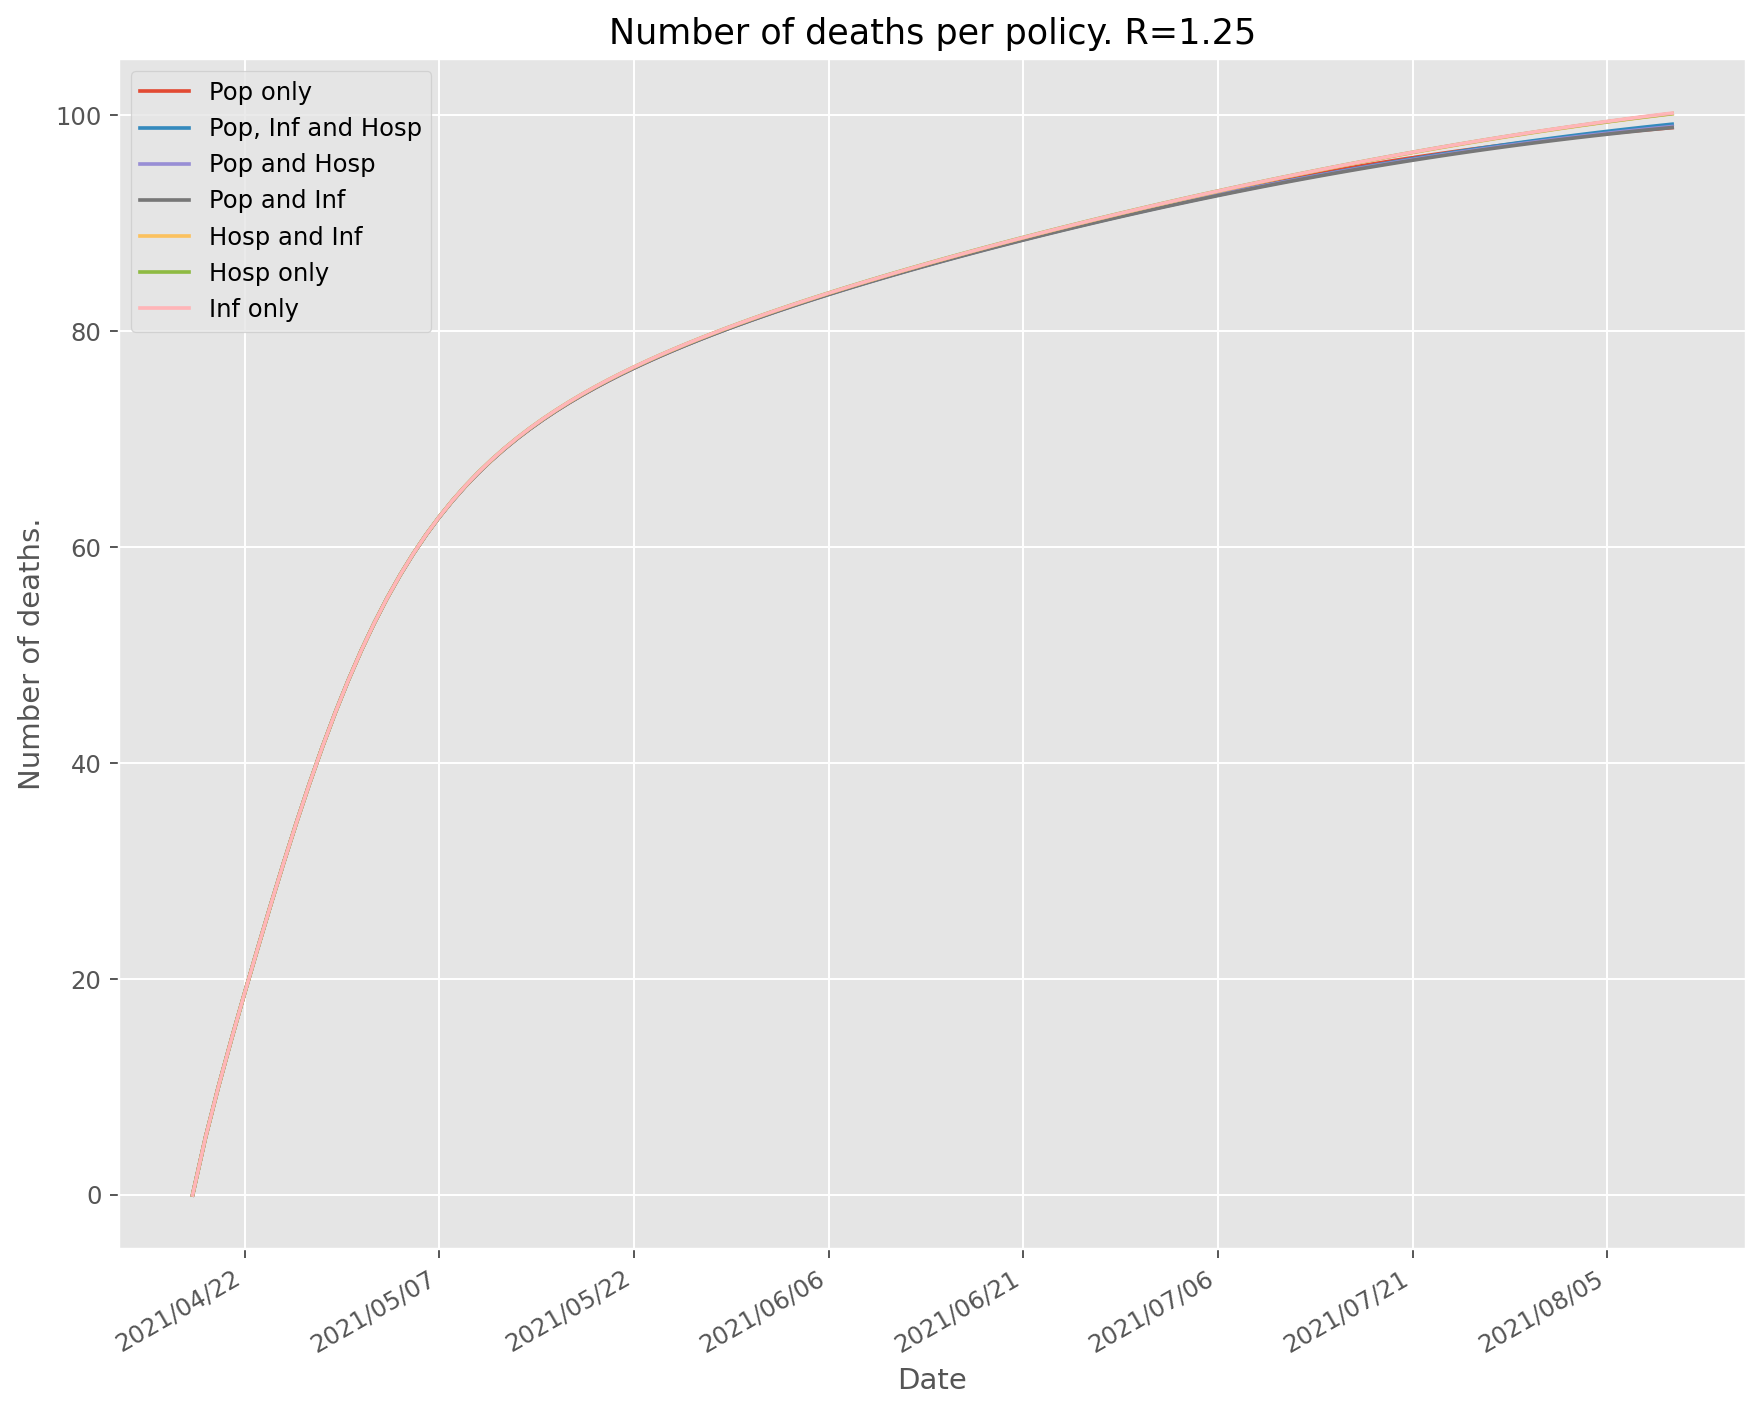

In [6]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 165.9673558096906
Pop and Inf: 168.77033735257461
Pop and Hosp: 169.11369867525804
Pop, Inf and Hosp: 170.88607692648492
Hosp only: 176.2448364003712
Hosp and Inf: 176.3913734101684
Inf only: 176.85974244315577


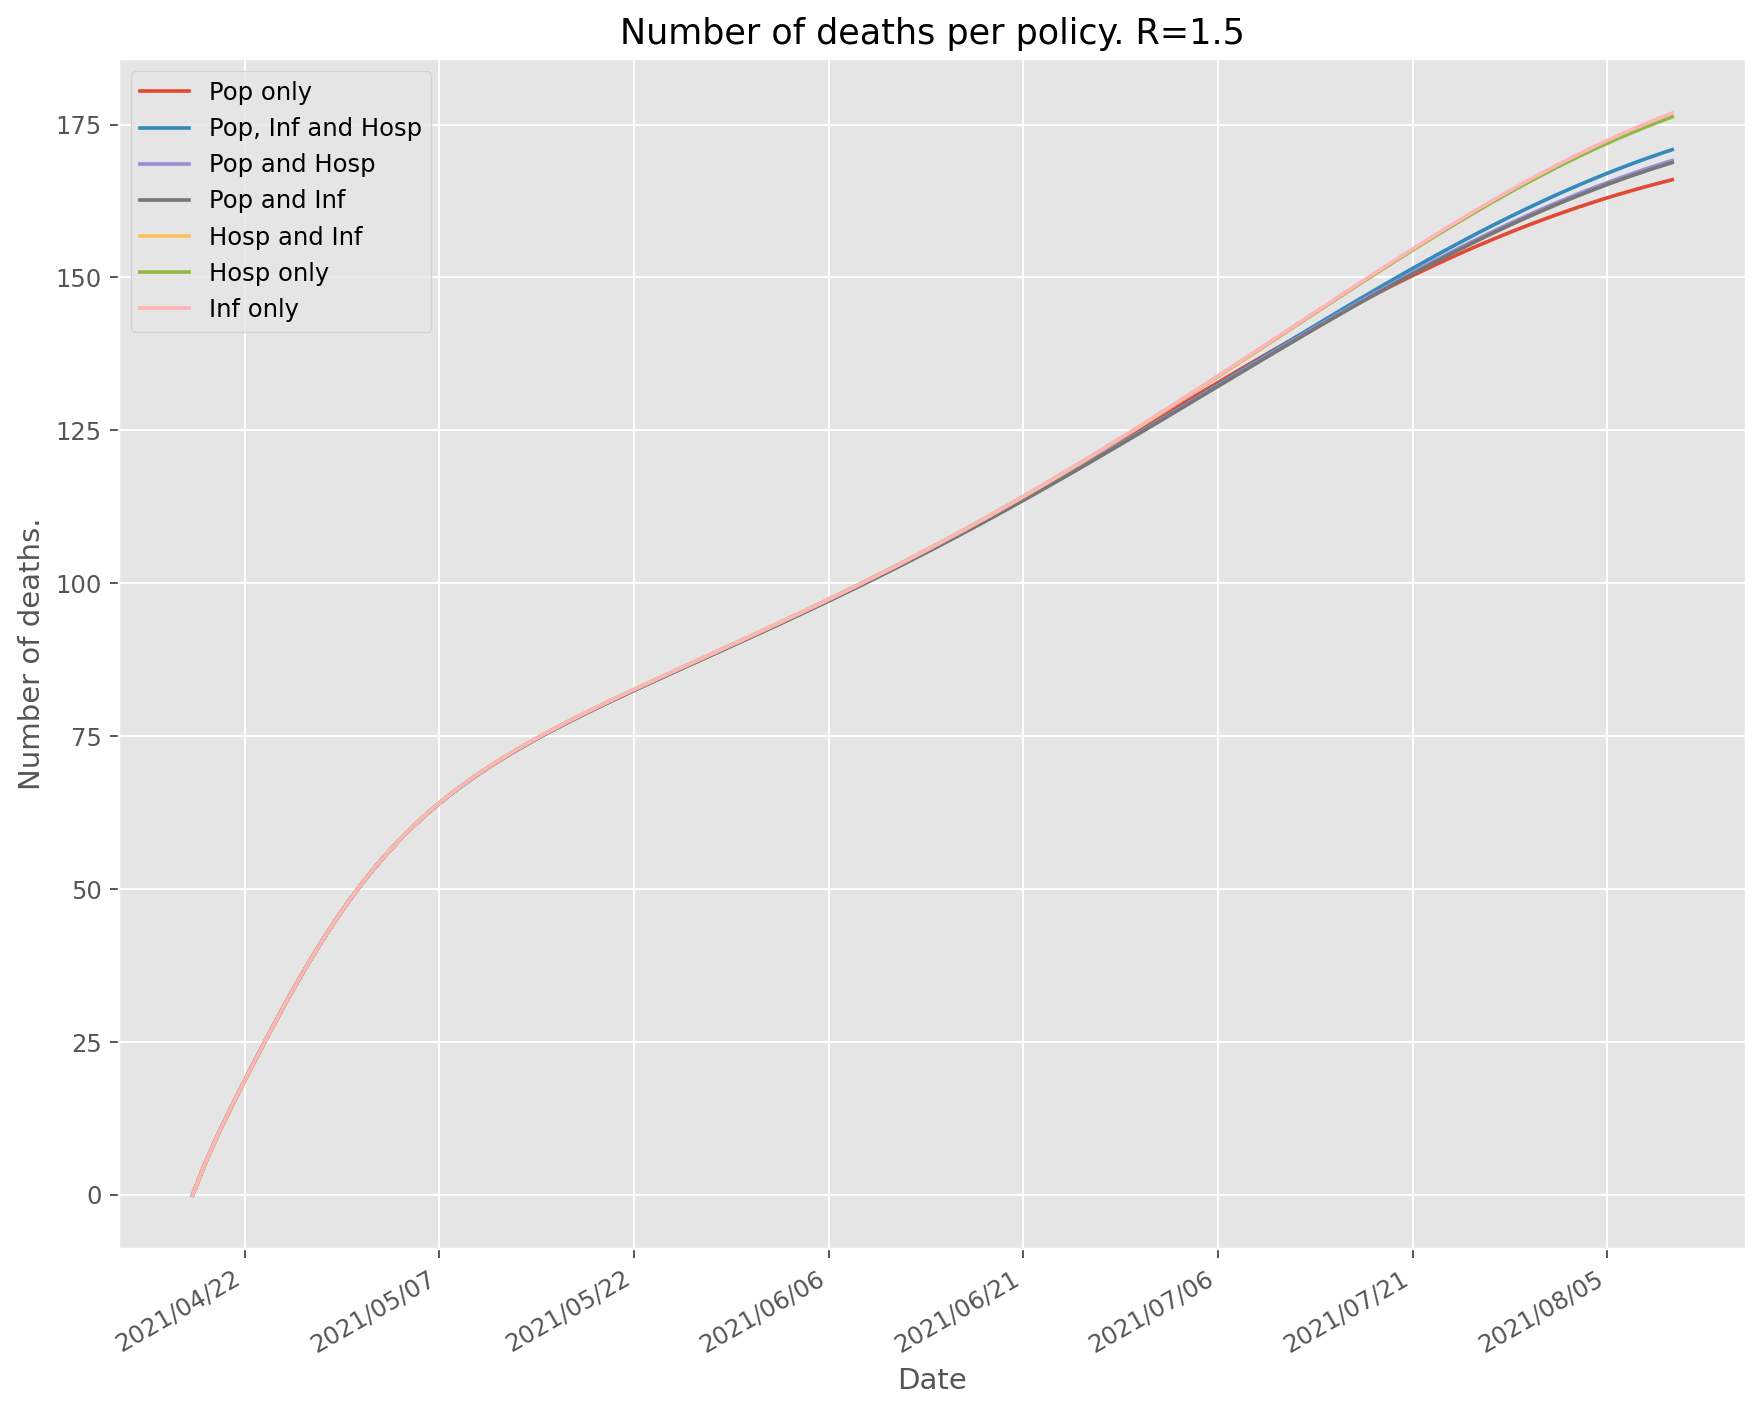

In [7]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 478.7709162649837
Pop and Inf: 495.87252953691745
Pop and Hosp: 496.77075292063114
Pop, Inf and Hosp: 504.76559426757916
Hosp only: 529.3522432998419
Hosp and Inf: 530.4612827627585
Inf only: 532.6827403731893


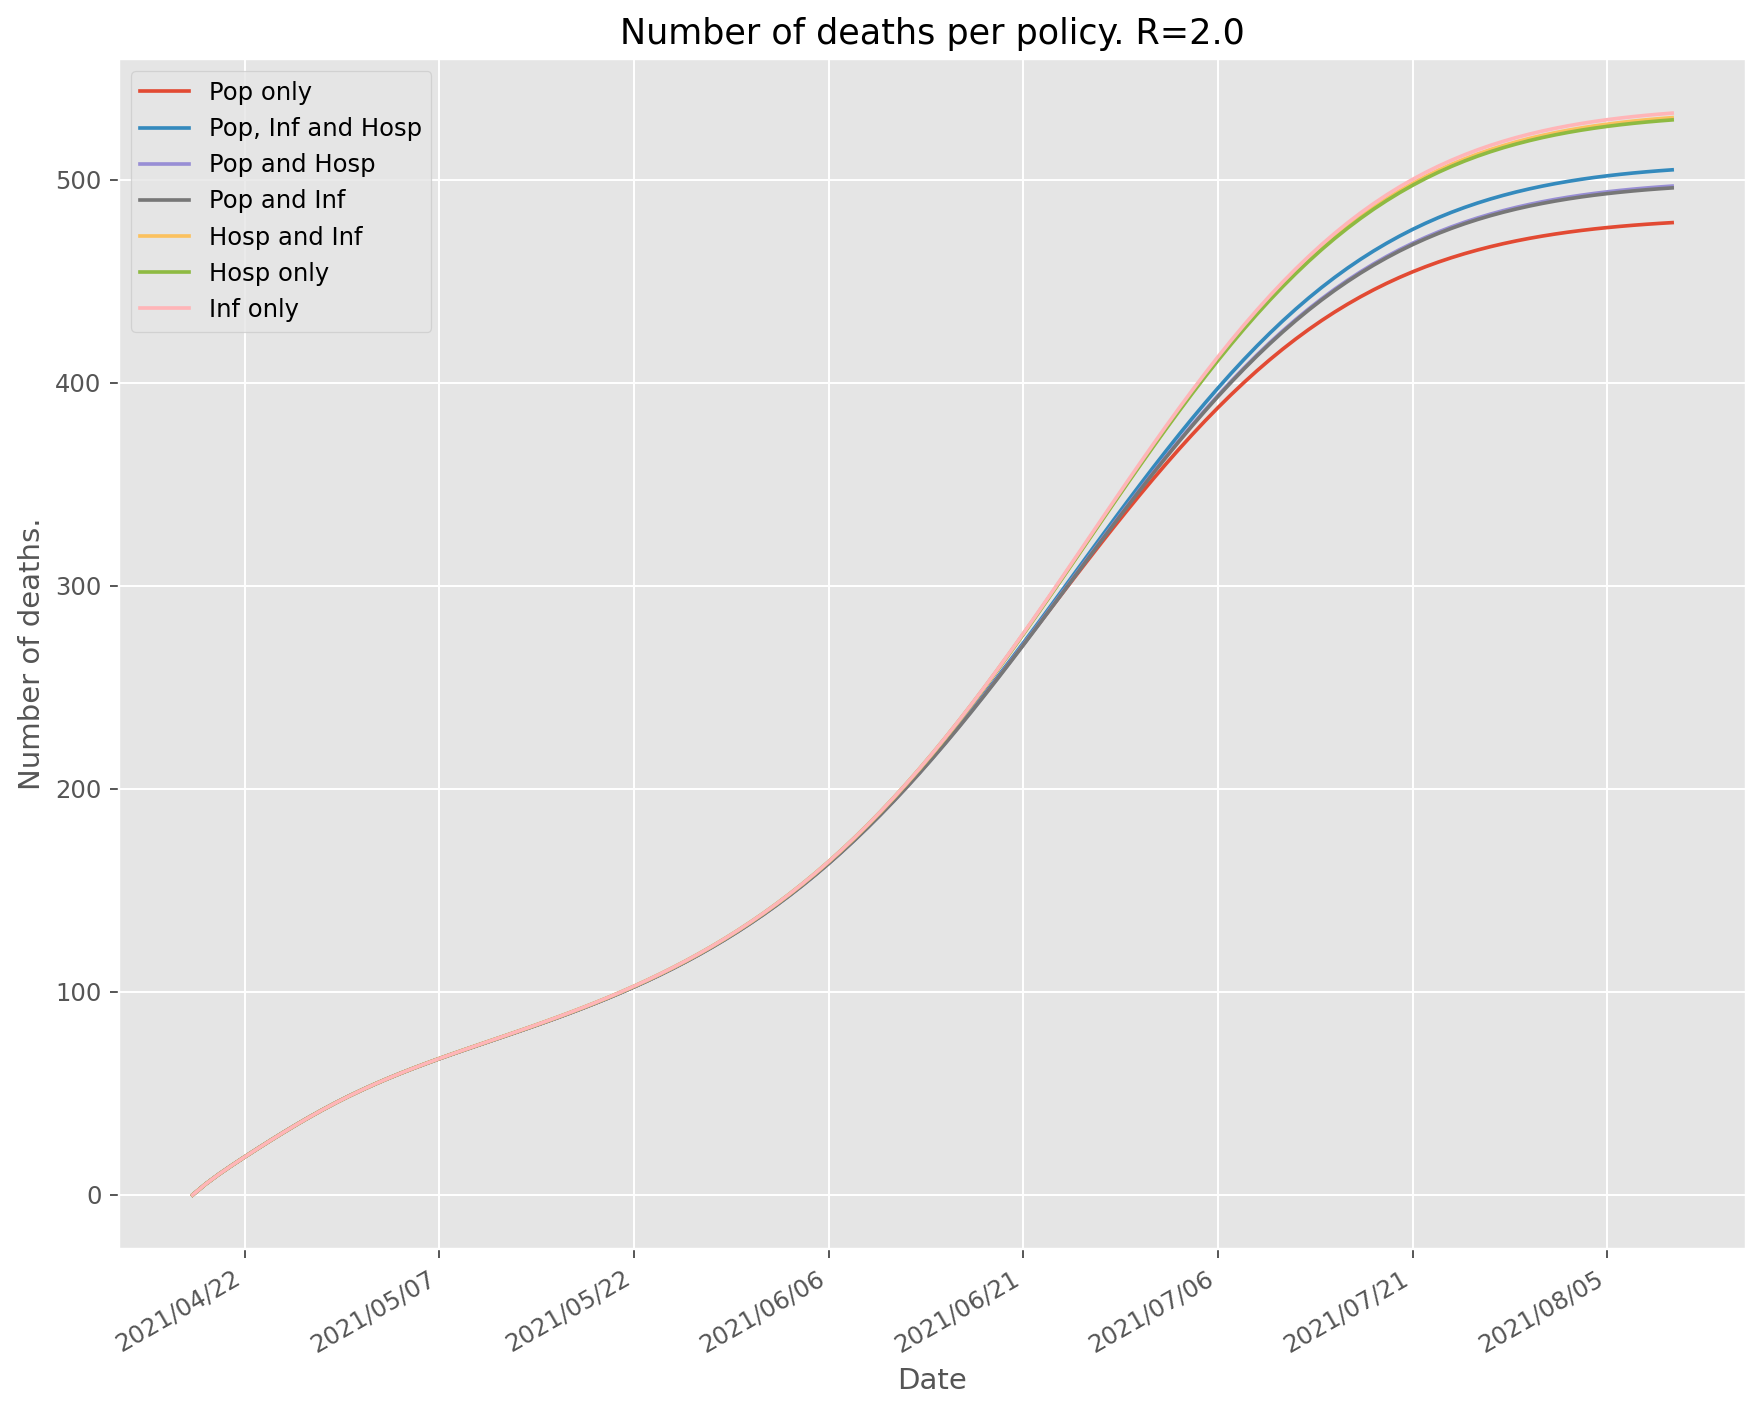

In [8]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

# Death incidence

Pop and Inf: 78.3555300251369
Pop and Hosp: 78.37791723271222
Pop, Inf and Hosp: 78.39299927241345
Pop only: 78.420462131732
Hosp and Inf: 78.5389807094421
Inf only: 78.54941149522956
Hosp only: 78.55469578507122


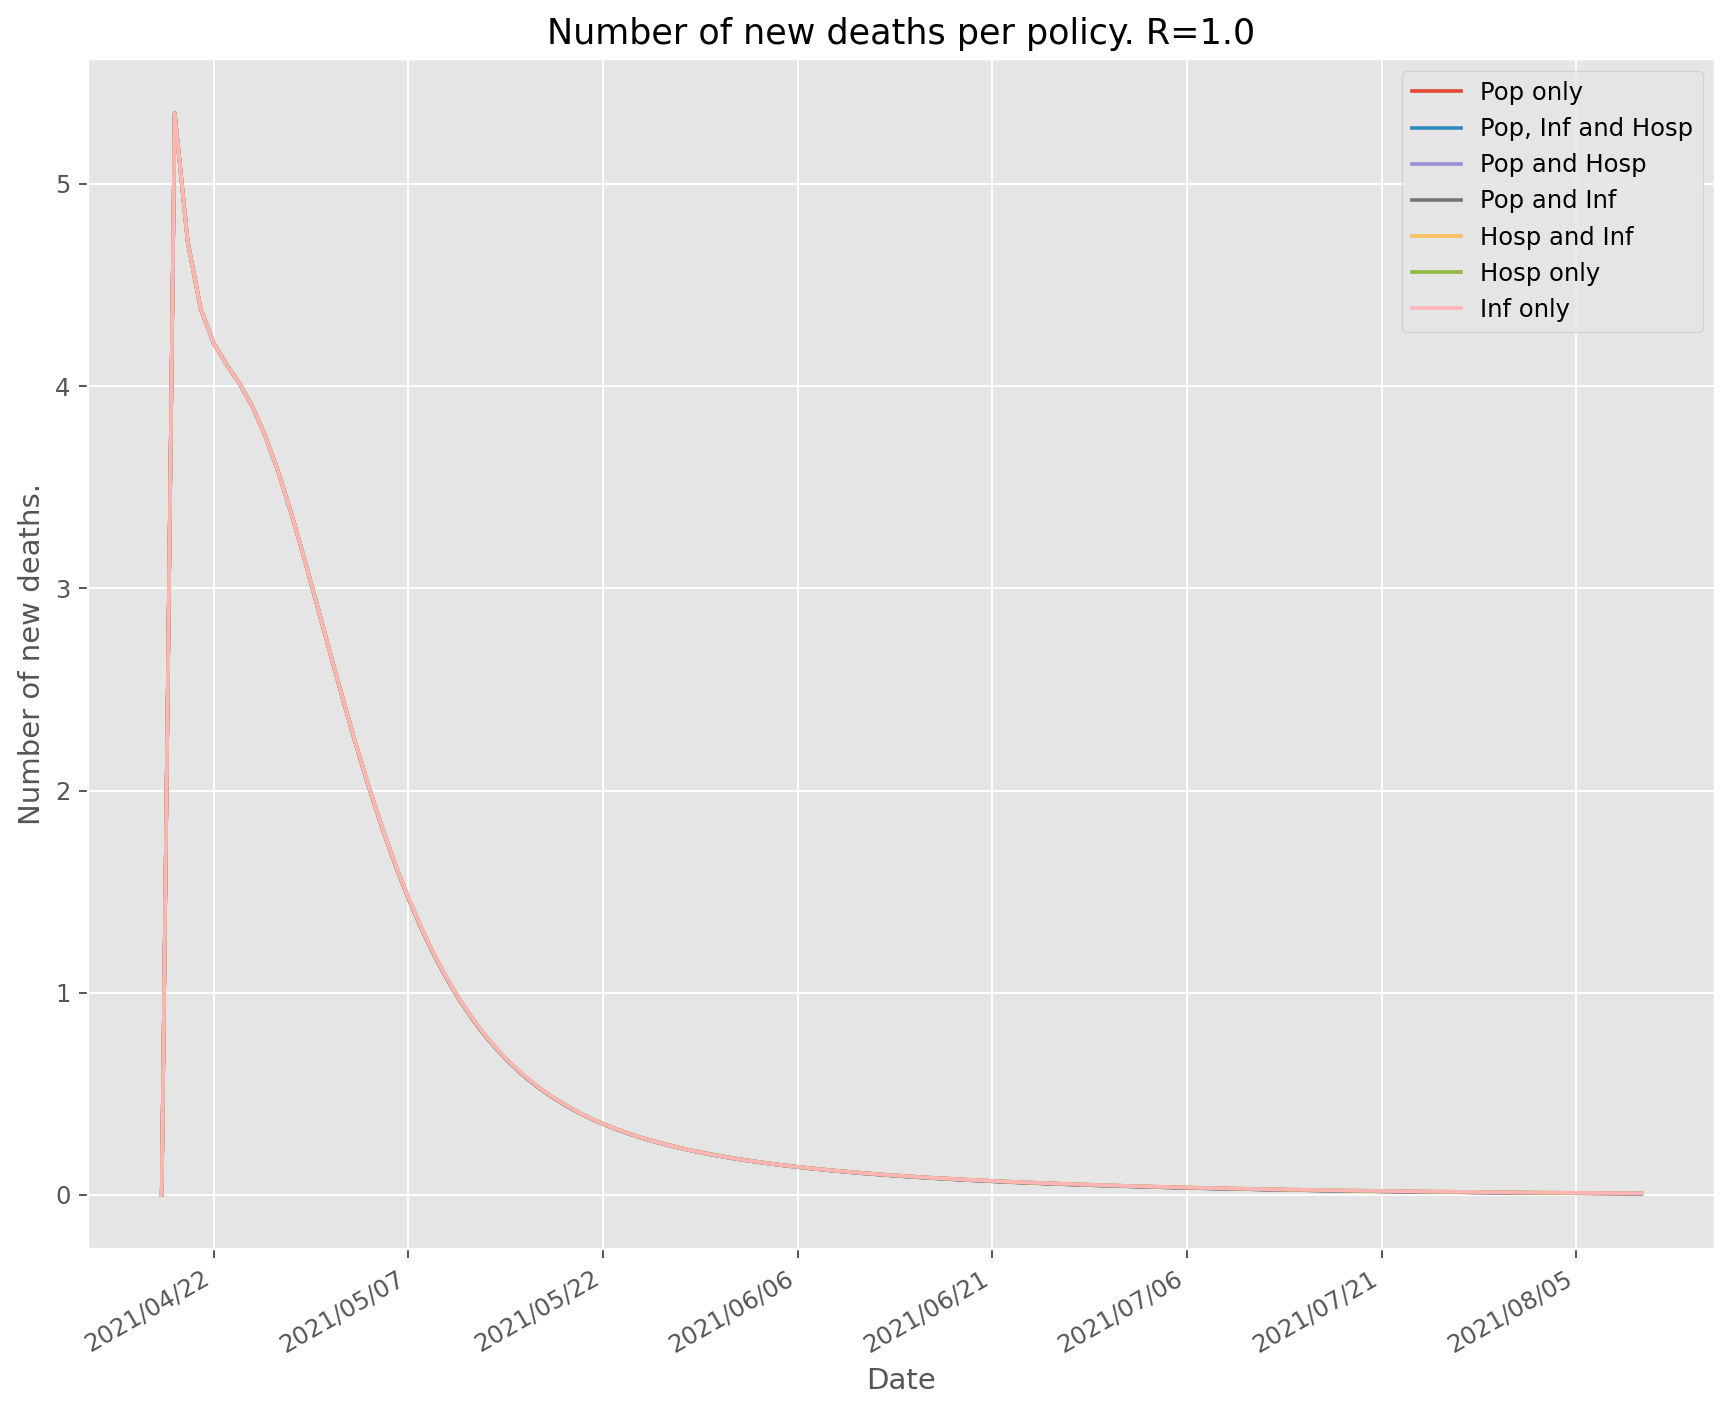

In [9]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='new deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 98.8449973438644
Pop and Inf: 98.85343510698823
Pop and Hosp: 98.94584027671905
Pop, Inf and Hosp: 99.16128735762771
Hosp and Inf: 100.12154701857241
Hosp only: 100.14192169366223
Inf only: 100.18593242286939


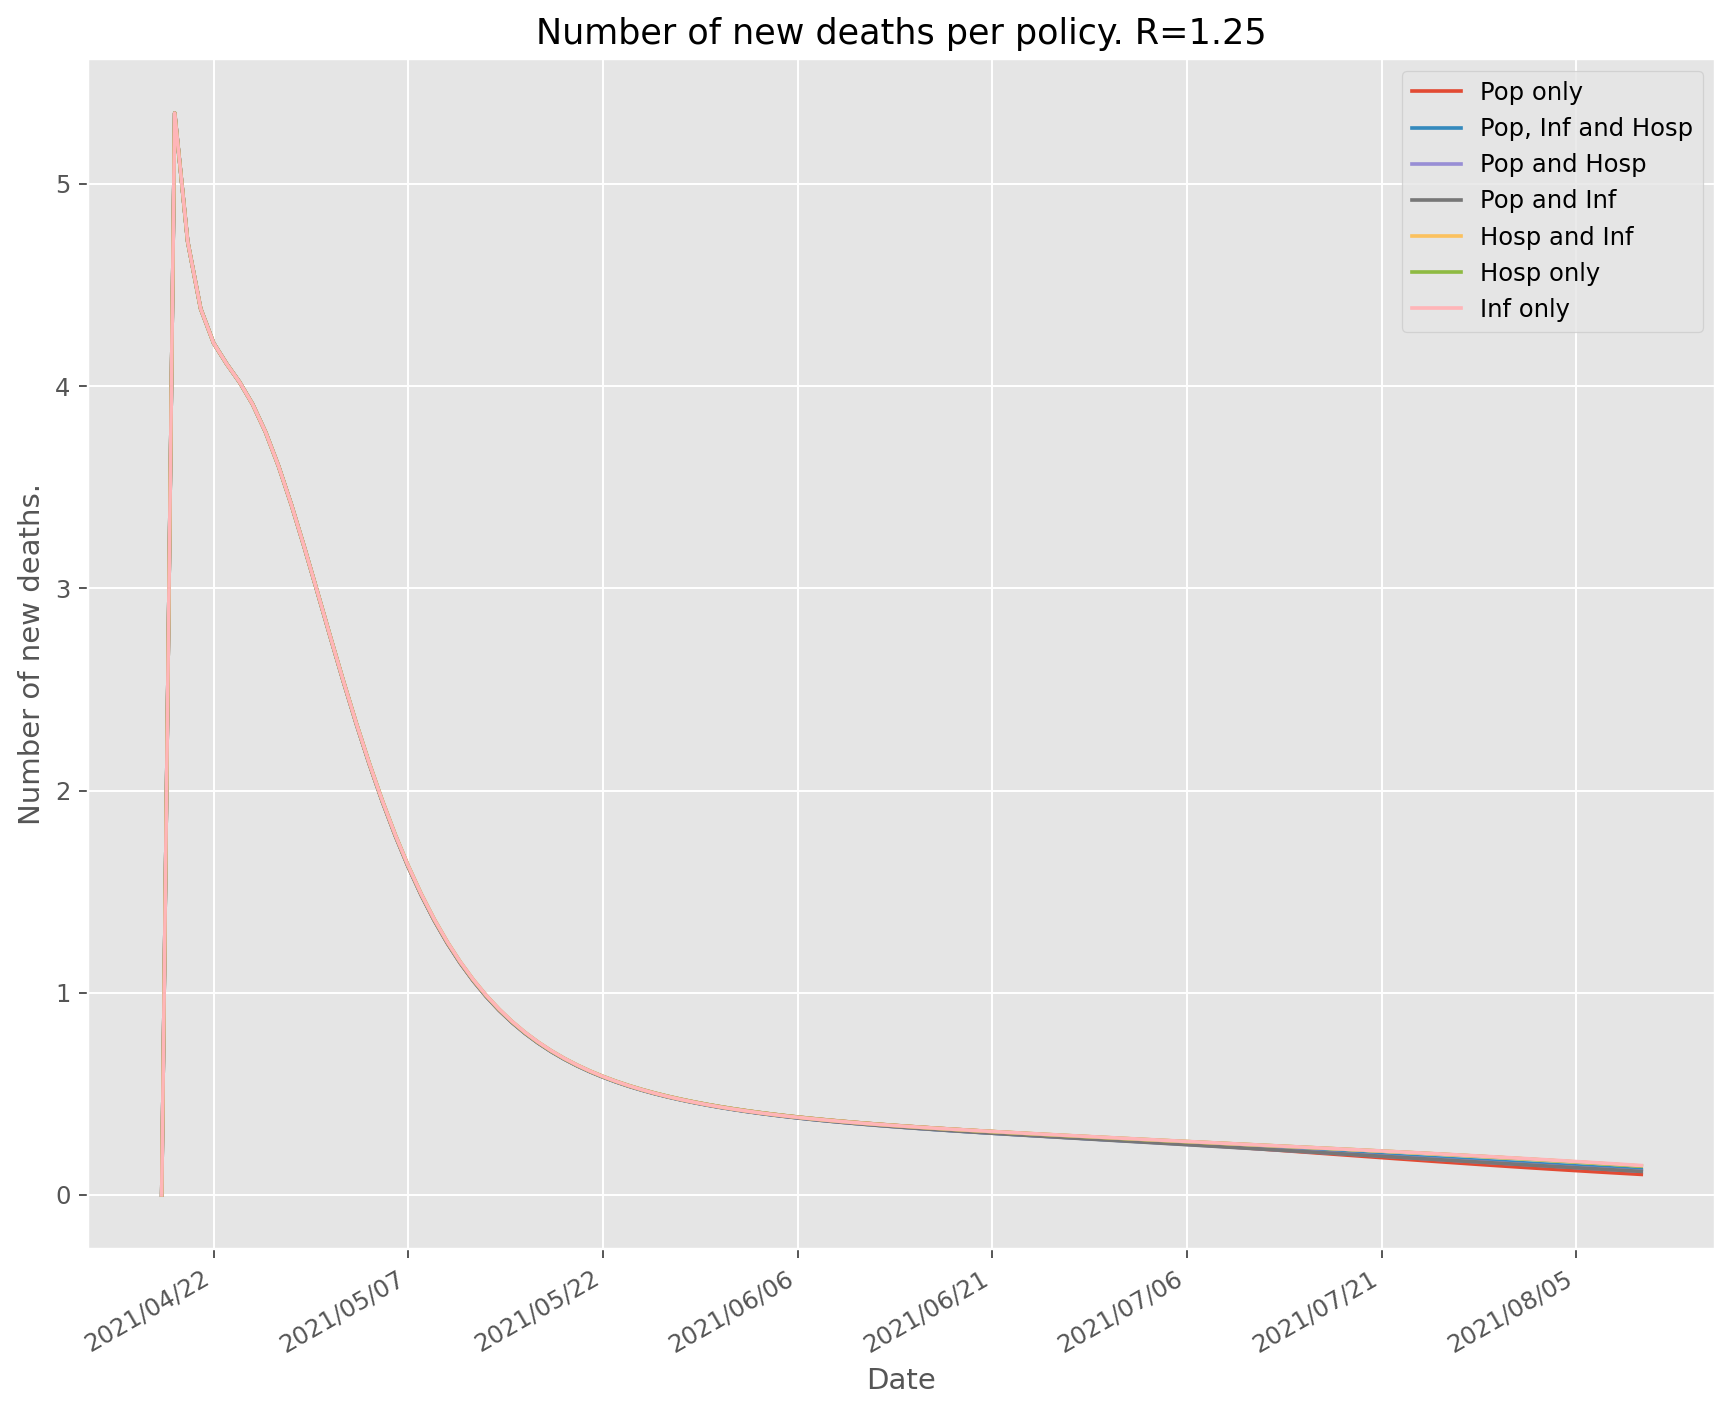

In [10]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='new deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 165.9673558096906
Pop and Inf: 168.77033735257461
Pop and Hosp: 169.113698675258
Pop, Inf and Hosp: 170.88607692648492
Hosp only: 176.2448364003712
Hosp and Inf: 176.3913734101684
Inf only: 176.85974244315574


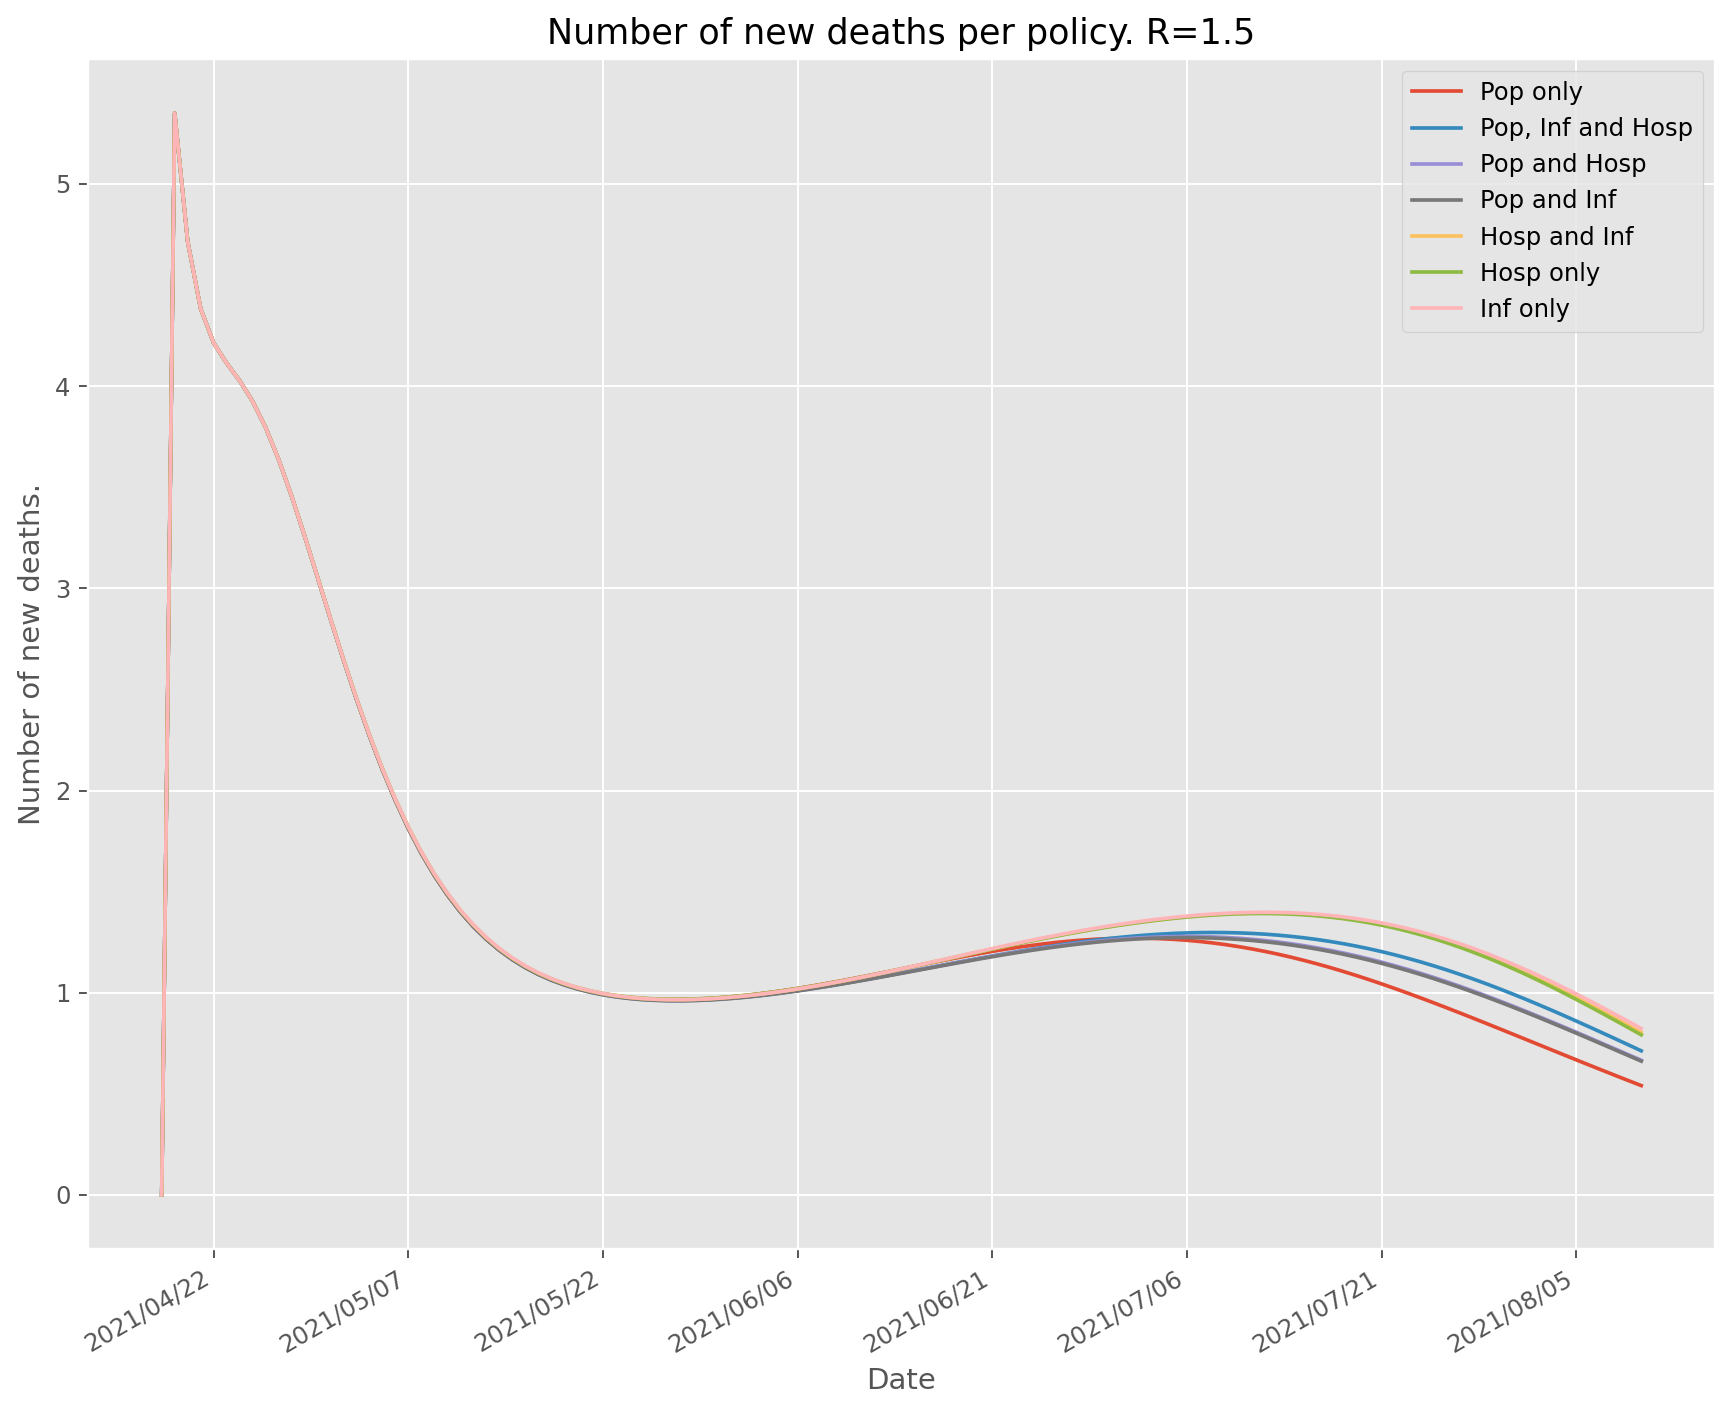

In [11]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='new deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 478.7709162649837
Pop and Inf: 495.87252953691745
Pop and Hosp: 496.77075292063114
Pop, Inf and Hosp: 504.76559426757916
Hosp only: 529.3522432998419
Hosp and Inf: 530.4612827627585
Inf only: 532.6827403731893


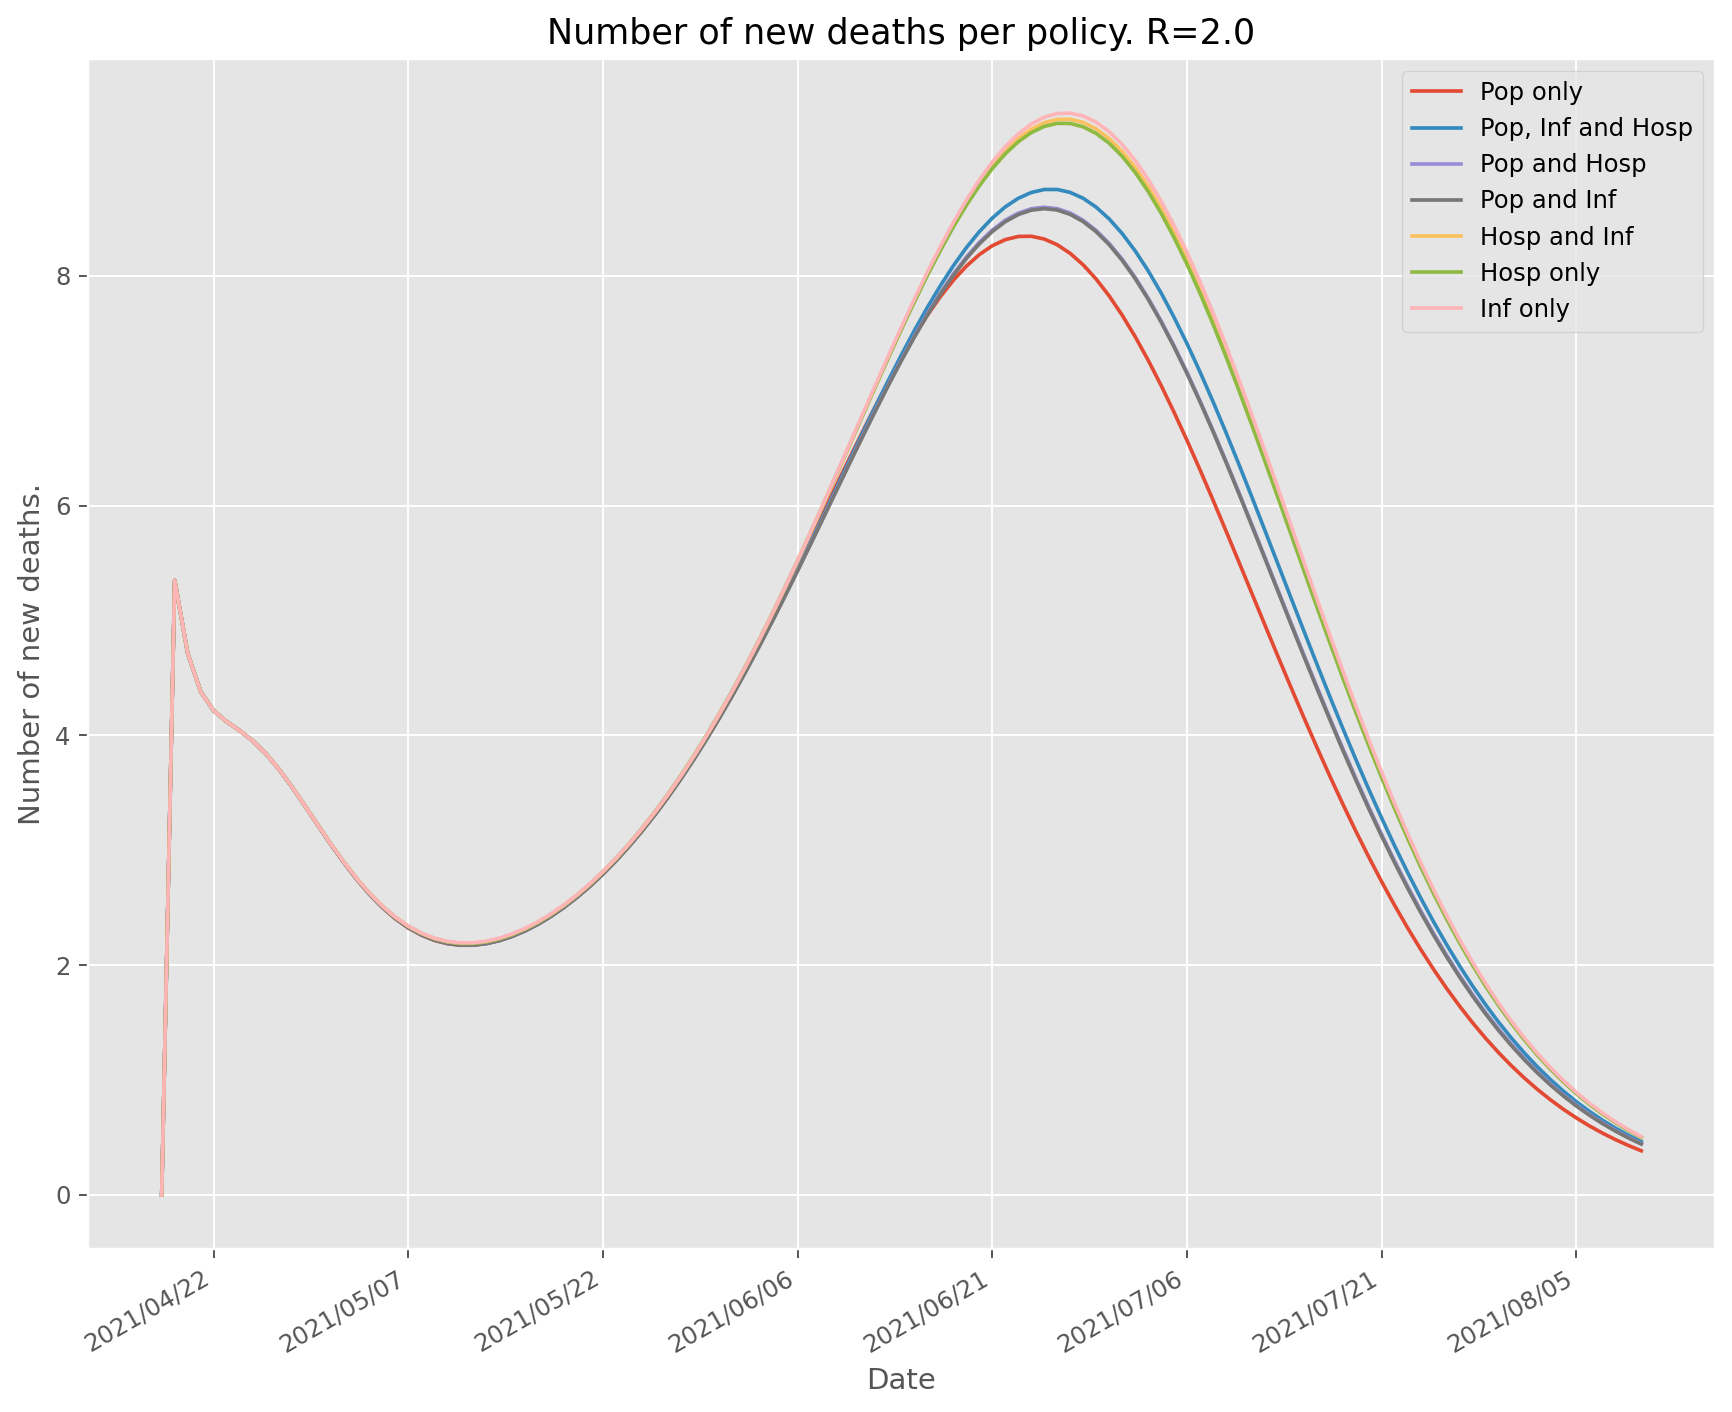

In [12]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='new deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

# Hospitalizations

Inf only: 7250.445872279007
Hosp and Inf: 7256.887875728317
Hosp only: 7266.462490127864
Pop, Inf and Hosp: 7269.522667785744
Pop and Inf: 7287.784902394313
Pop and Hosp: 7296.623676897542
Pop only: 7445.622213603571


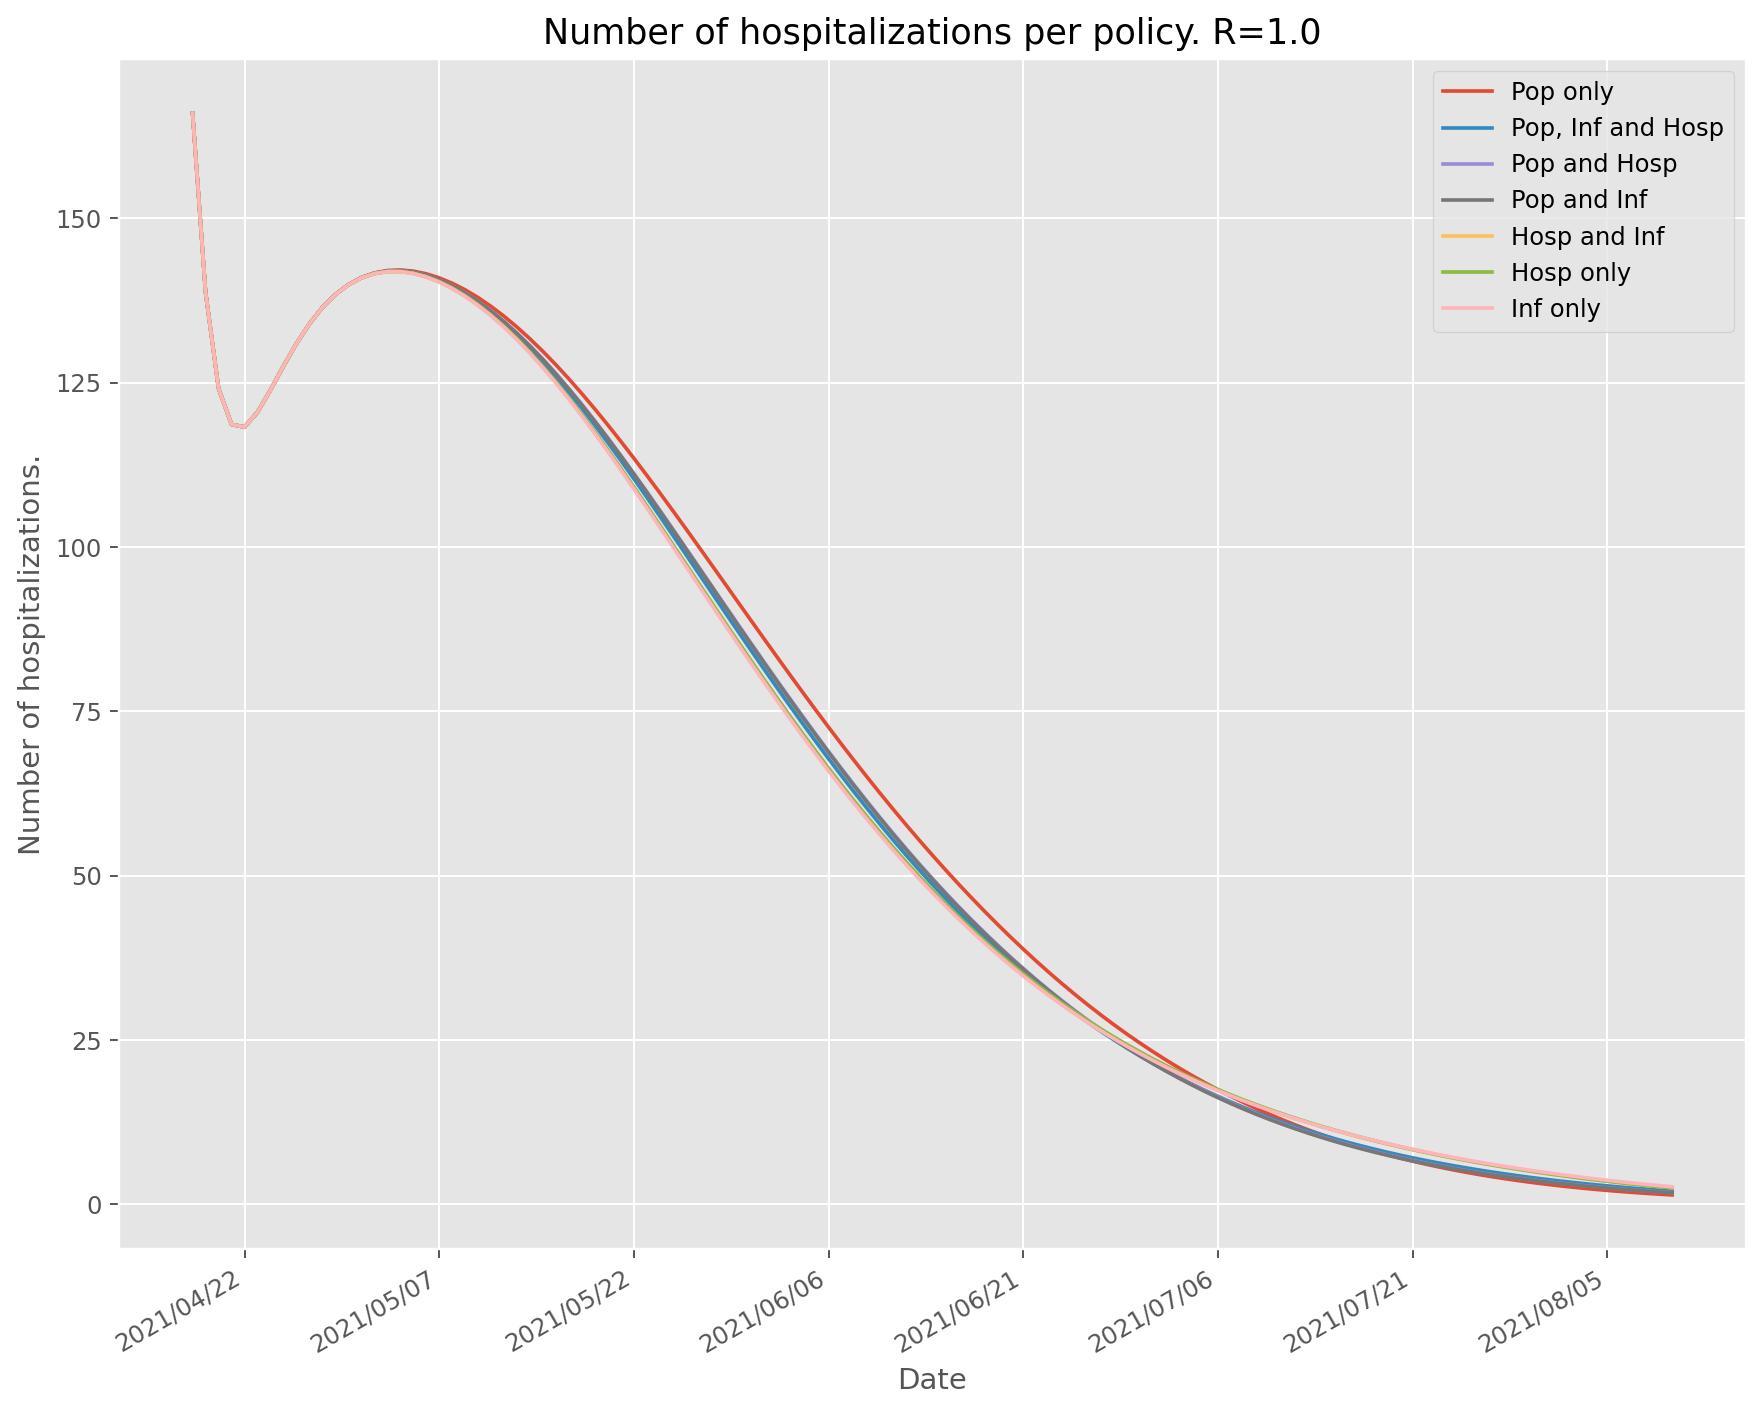

In [13]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop and Inf: 17752.408976982588
Pop and Hosp: 17802.391866860875
Pop, Inf and Hosp: 17873.441181811602
Pop only: 18148.307285433355
Hosp and Inf: 18283.61191691618
Hosp only: 18297.407408044306
Inf only: 18303.10348334305


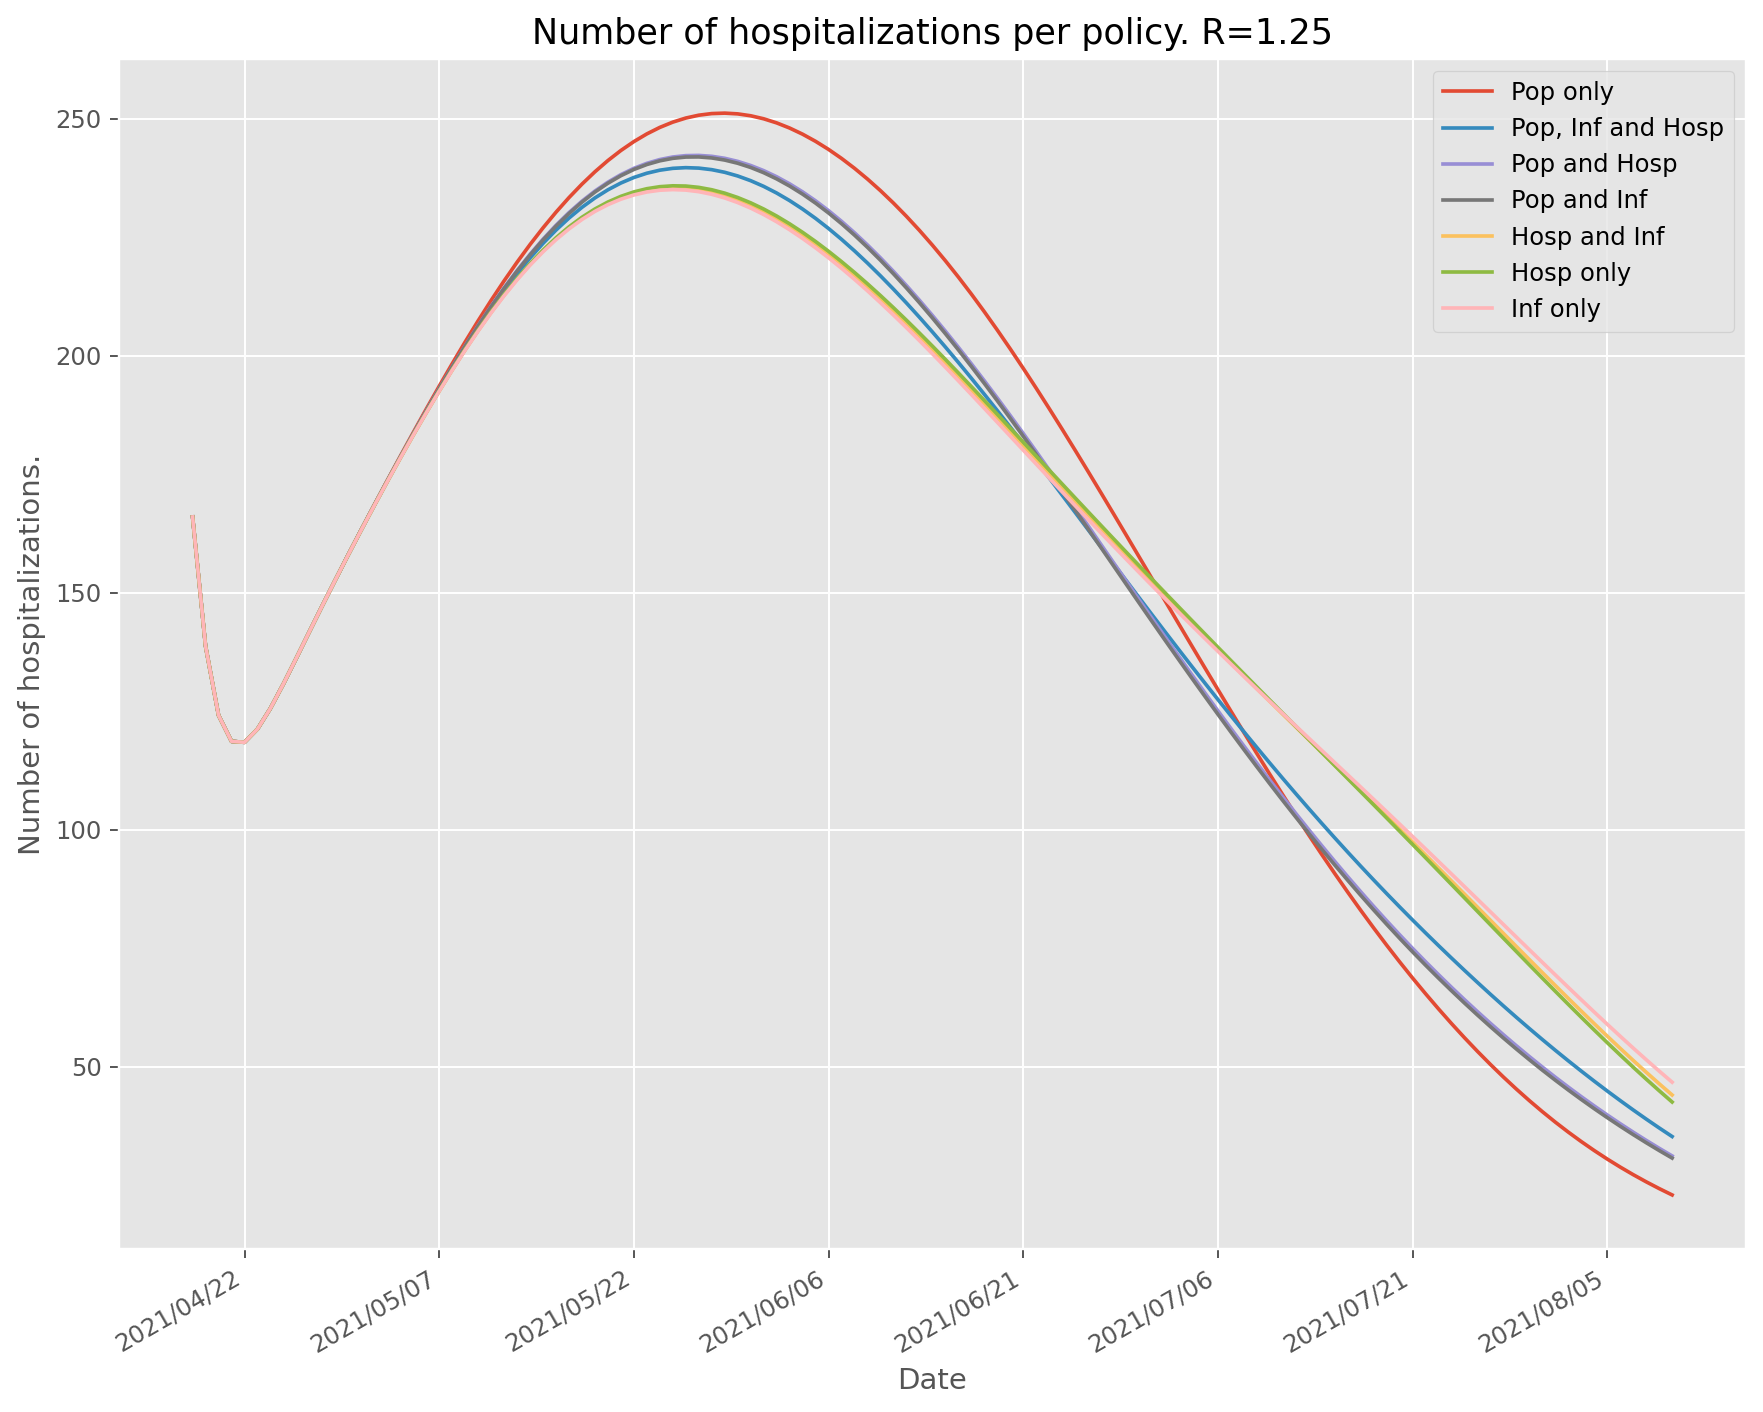

In [14]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 51258.74816300181
Pop and Inf: 51845.2328853933
Pop and Hosp: 52053.46173007484
Pop, Inf and Hosp: 53062.944746592744
Hosp only: 56031.28925448389
Hosp and Inf: 56113.27445347928
Inf only: 56387.88338640472


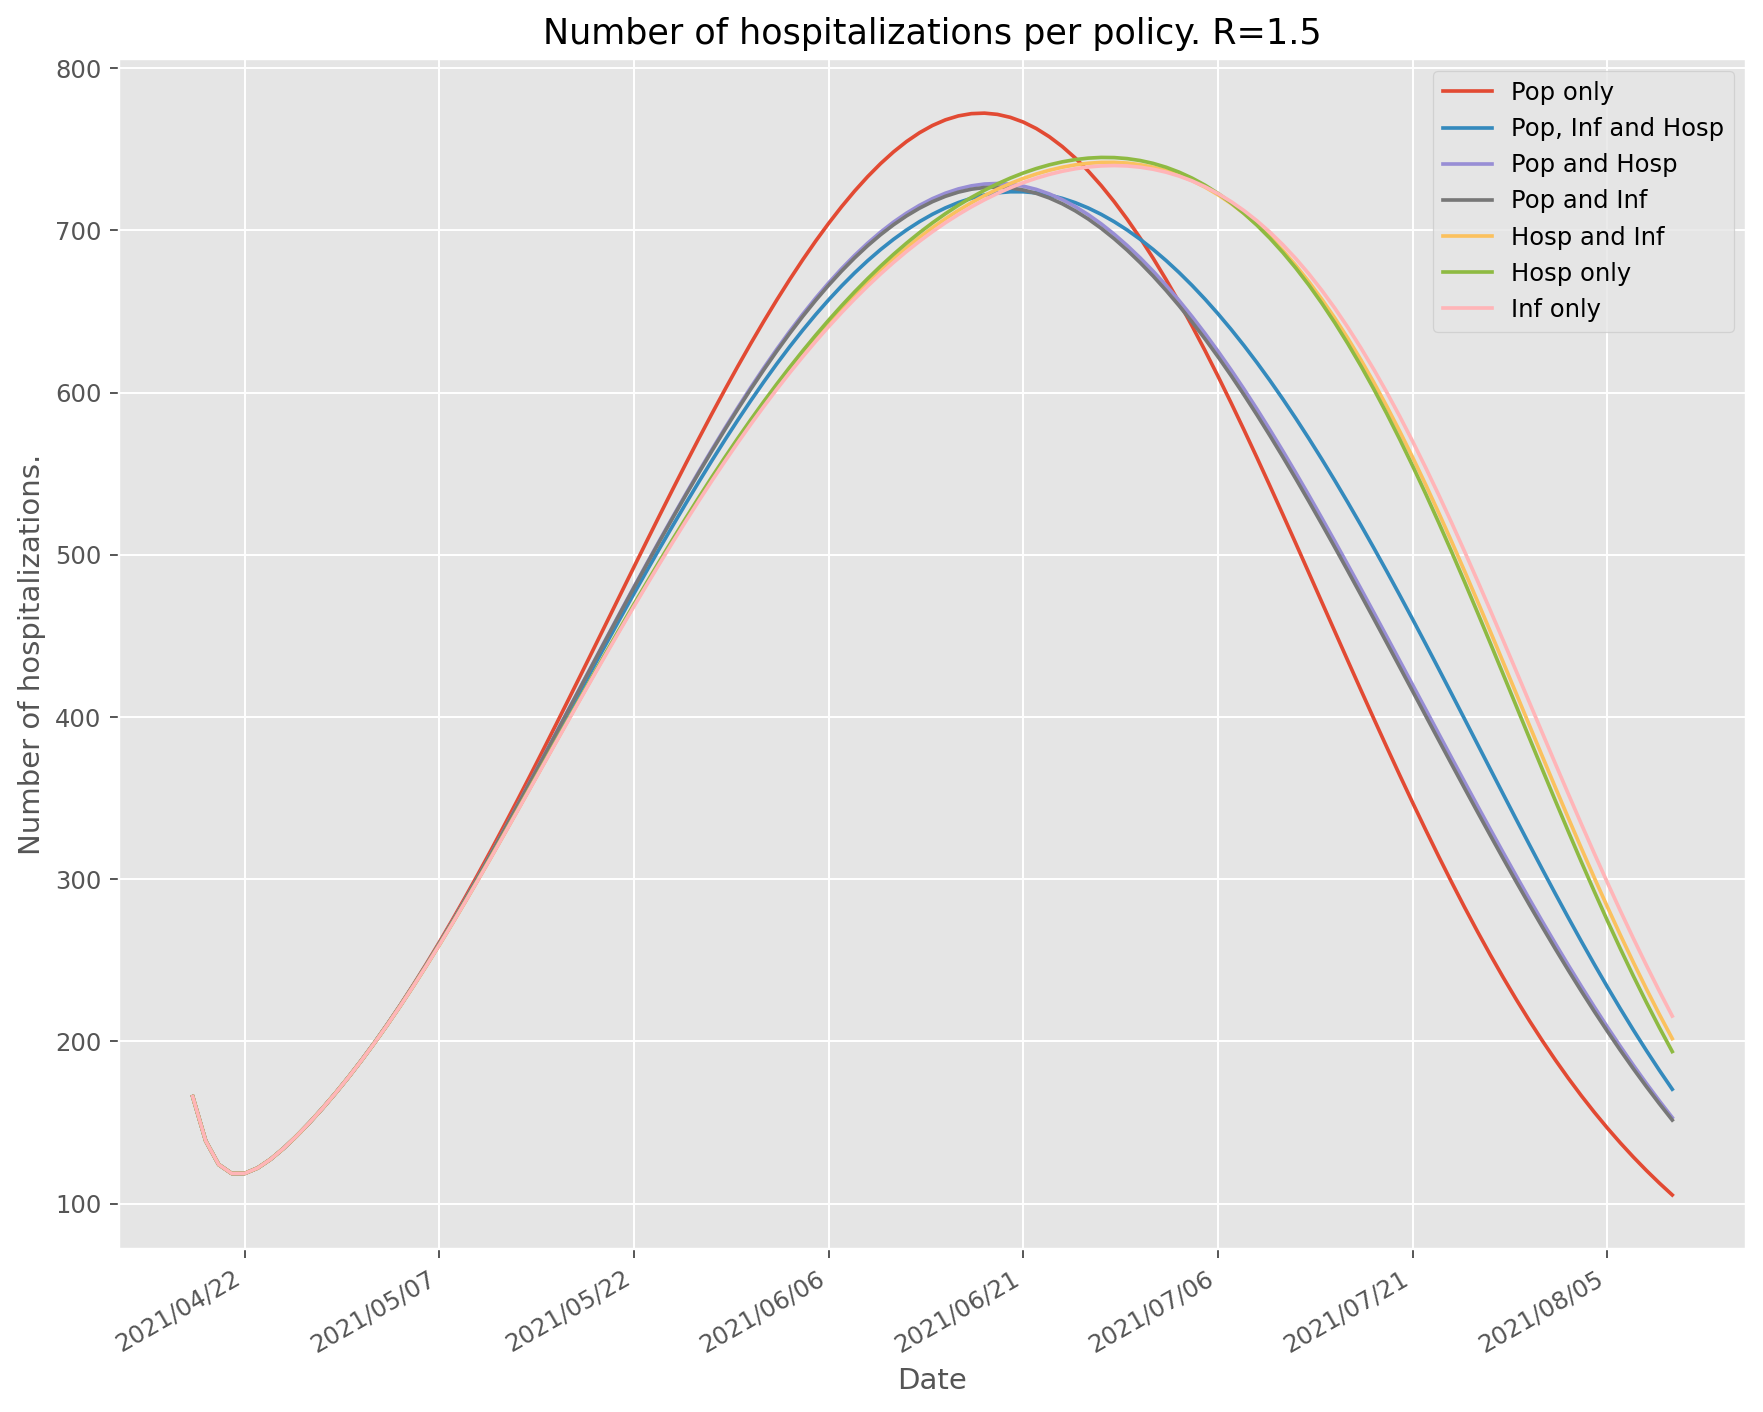

In [15]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 188729.38127396518
Pop and Inf: 194929.97554899033
Pop and Hosp: 195515.7217240171
Pop, Inf and Hosp: 199149.29470497387
Hosp and Inf: 209399.28787245622
Inf only: 209534.95460463376
Hosp only: 209607.0781900319


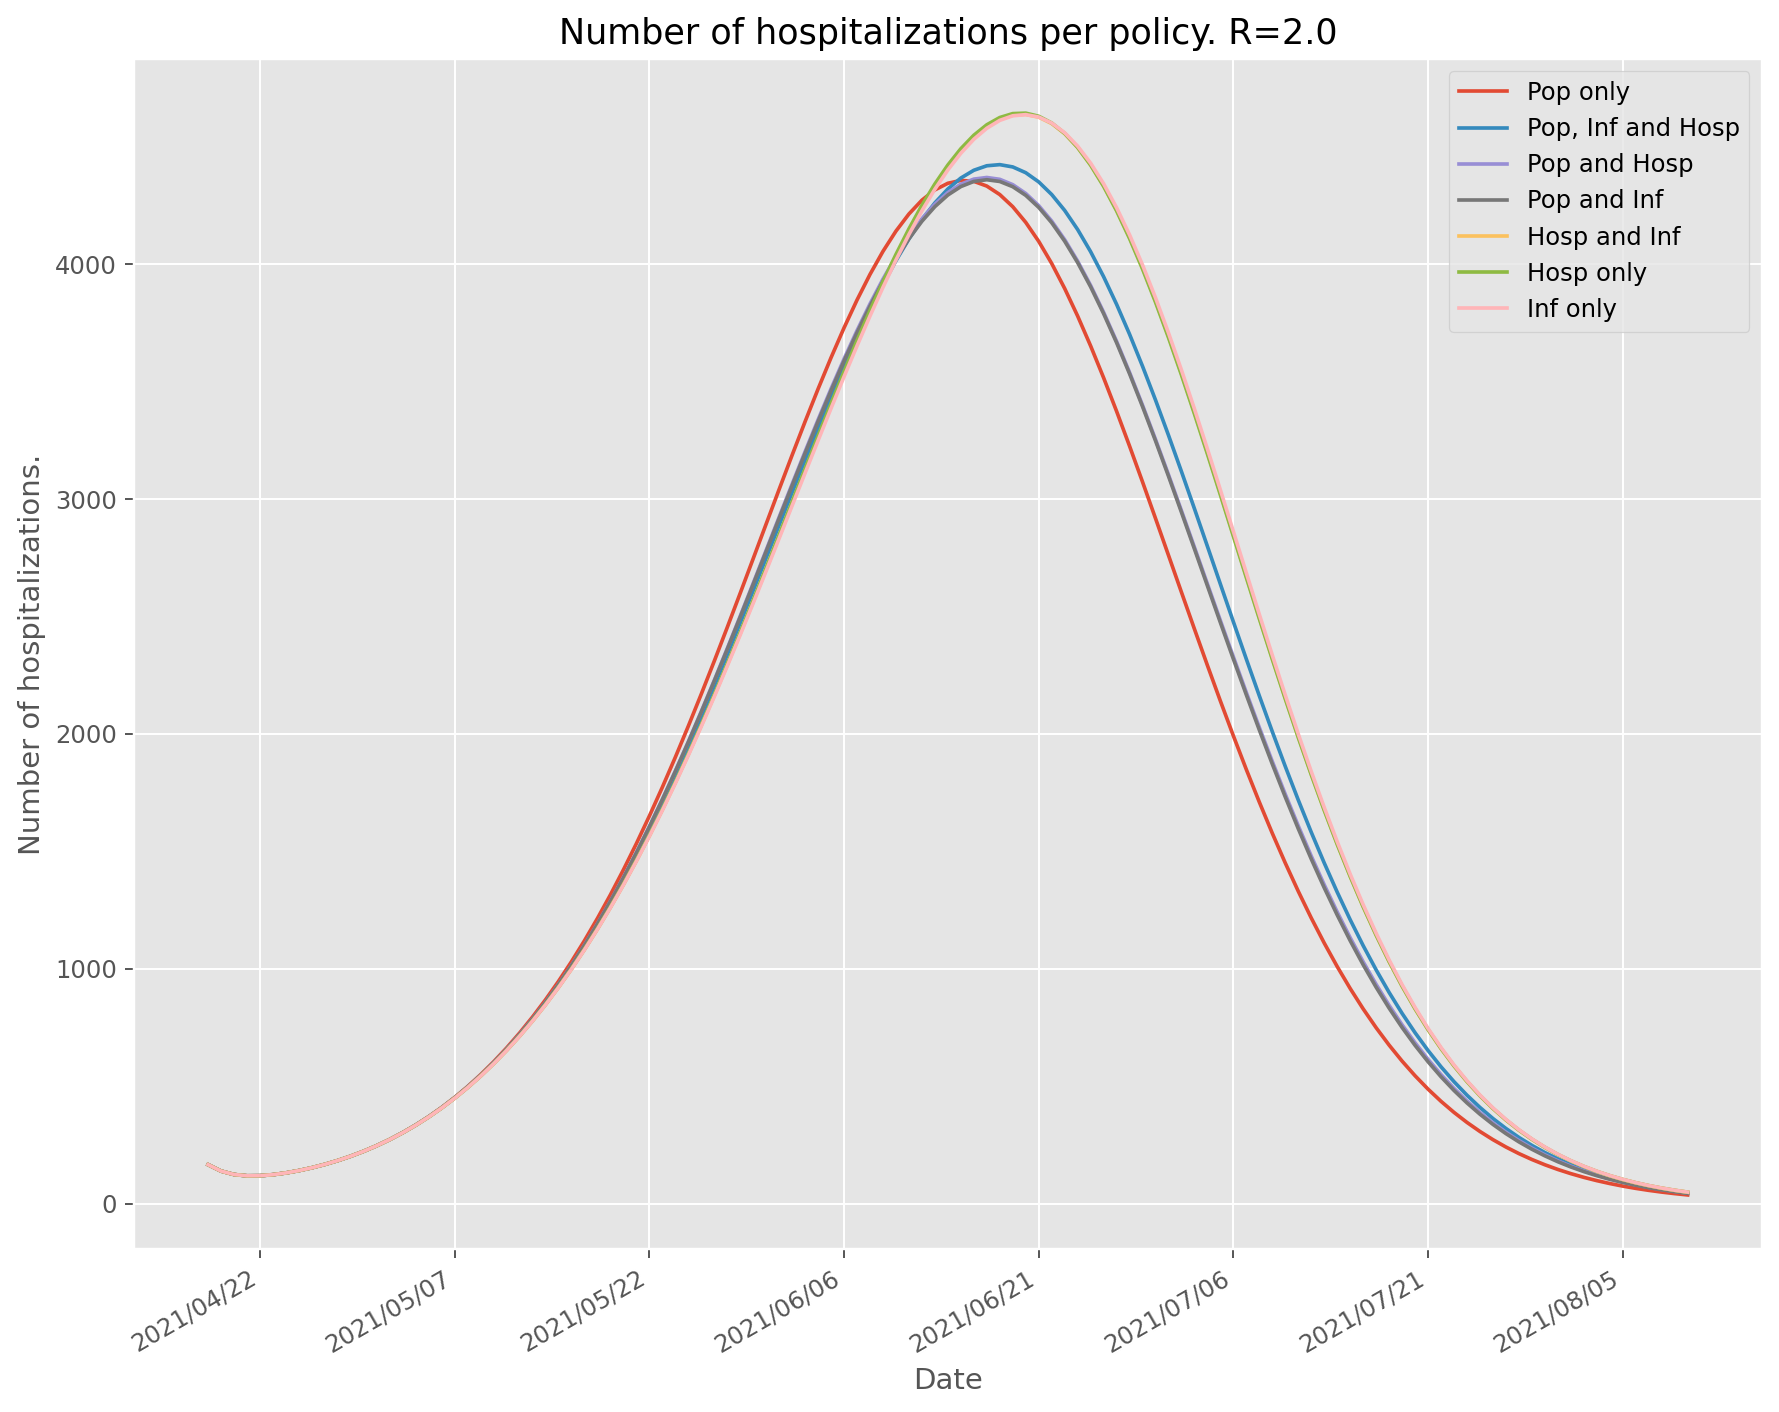

In [16]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

# New Hospitalizations

Inf only: 1226.4258806429891
Hosp and Inf: 1227.612599258785
Hosp only: 1229.4342090850123
Pop, Inf and Hosp: 1230.1193955253548
Pop and Inf: 1233.671861485124
Pop and Hosp: 1235.4097431459143
Pop only: 1264.7878759249554


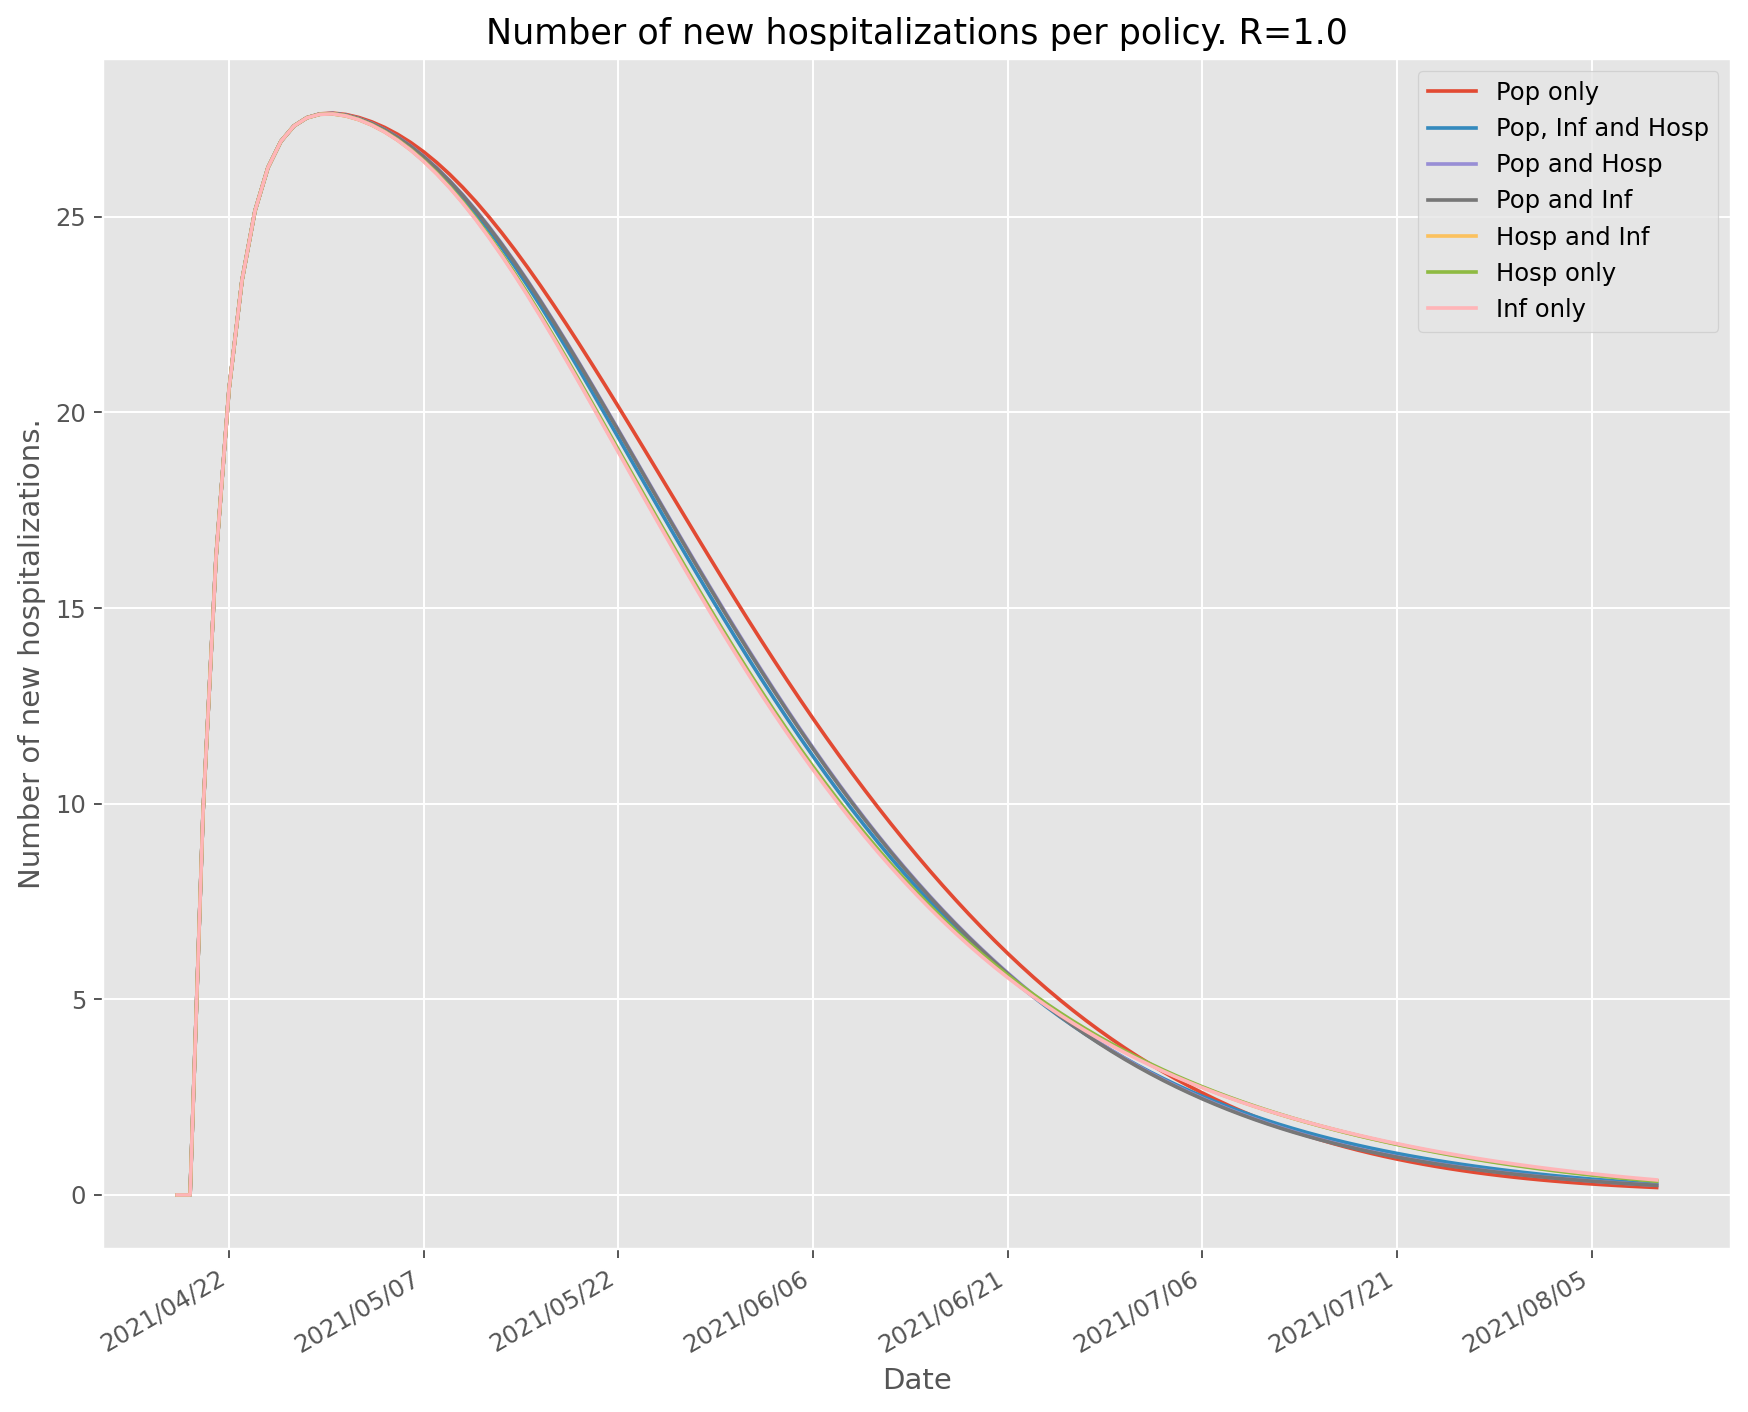

In [17]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='new hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop and Inf: 3325.5480527419772
Pop and Hosp: 3335.784193998372
Pop, Inf and Hosp: 3352.5626581982256
Pop only: 3398.526431586382
Hosp and Inf: 3438.4816748739163
Hosp only: 3440.1002096570105
Inf only: 3444.3010339269417


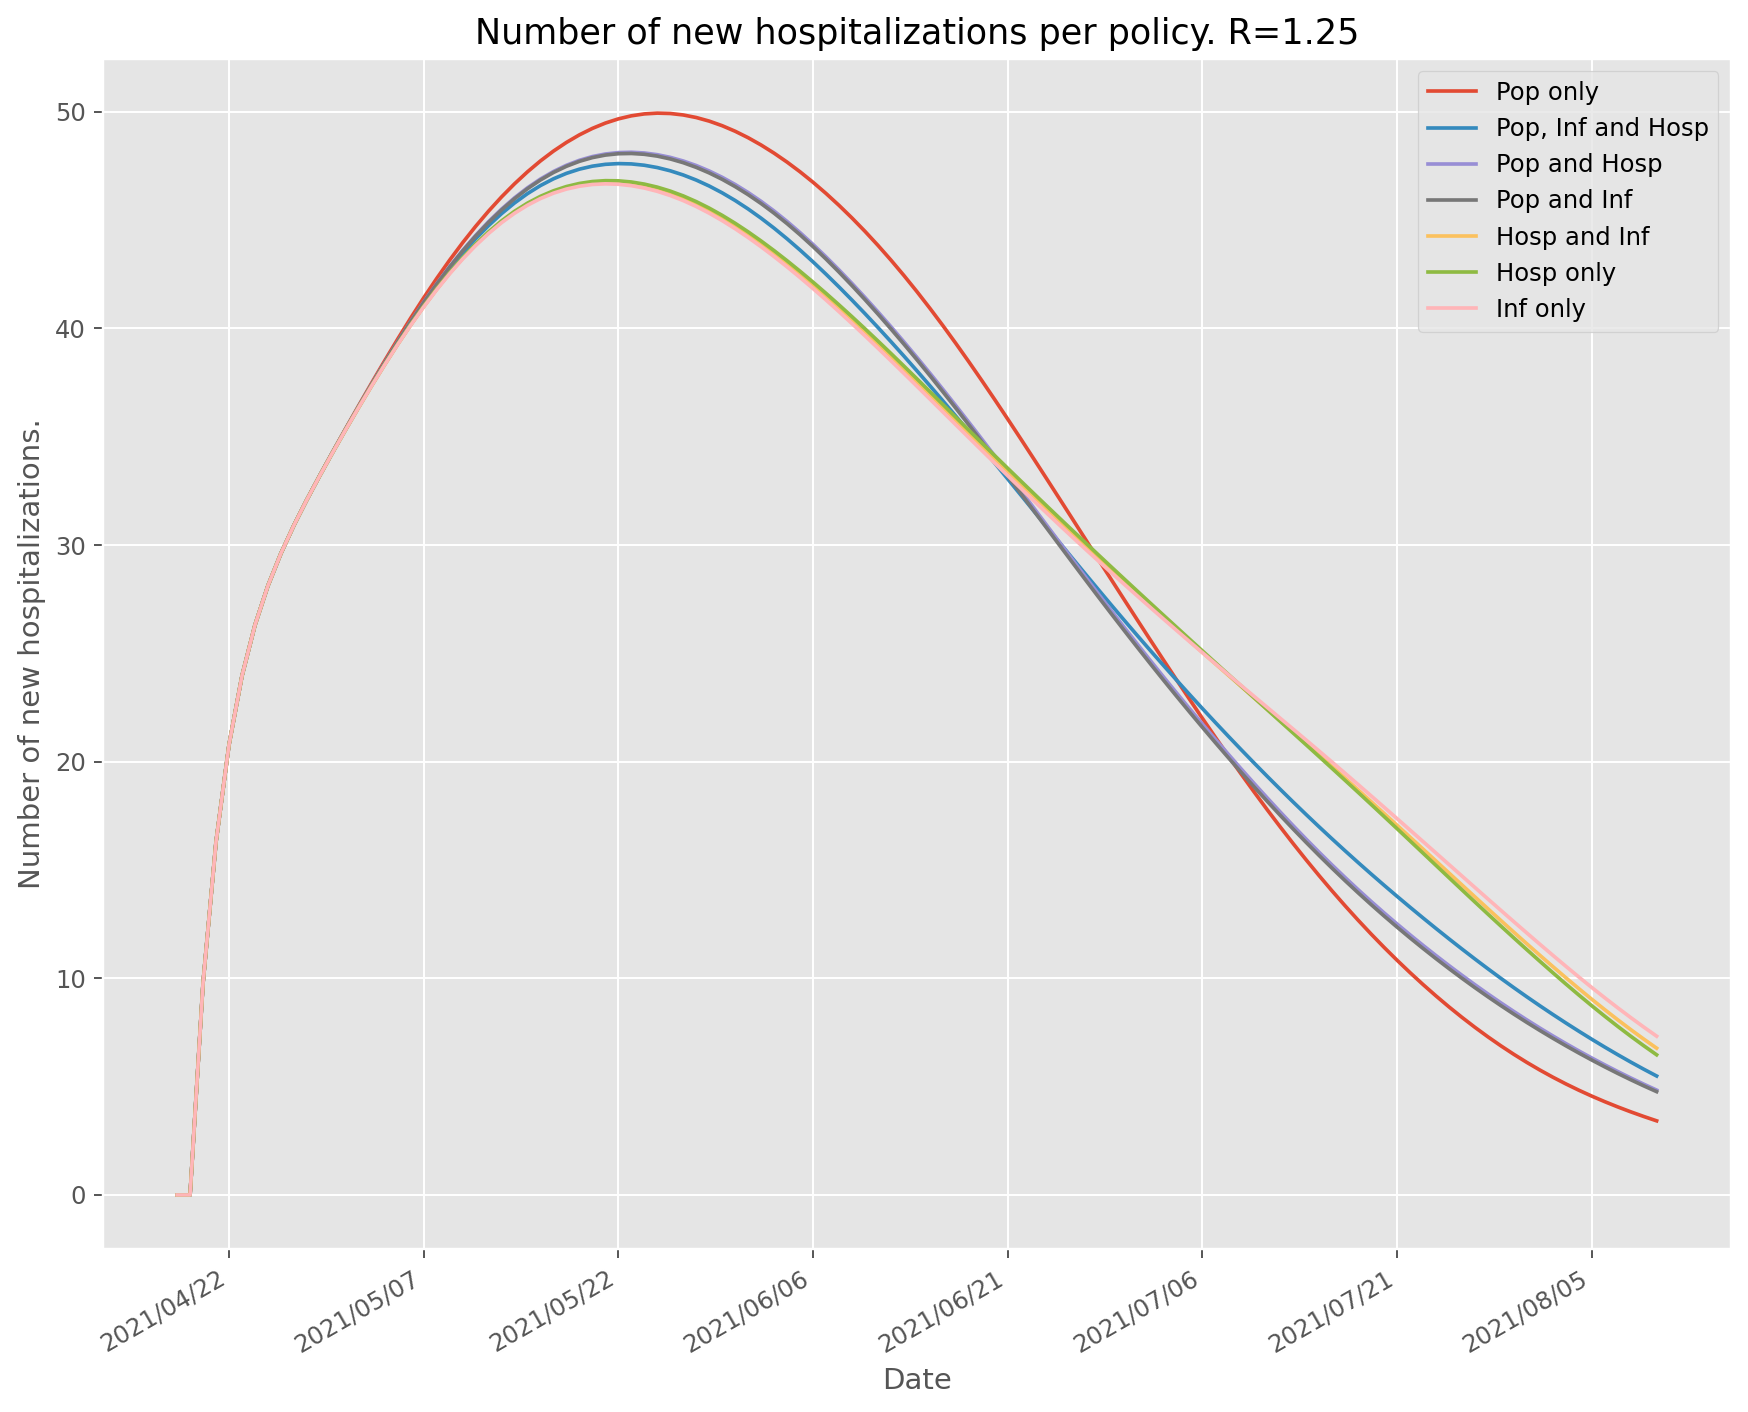

In [18]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='new hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 10016.477236563953
Pop and Inf: 10166.76861329495
Pop and Hosp: 10209.404215723922
Pop, Inf and Hosp: 10420.913612574017
Hosp only: 11017.92521362975
Hosp and Inf: 11039.81348096974
Inf only: 11104.12233859255


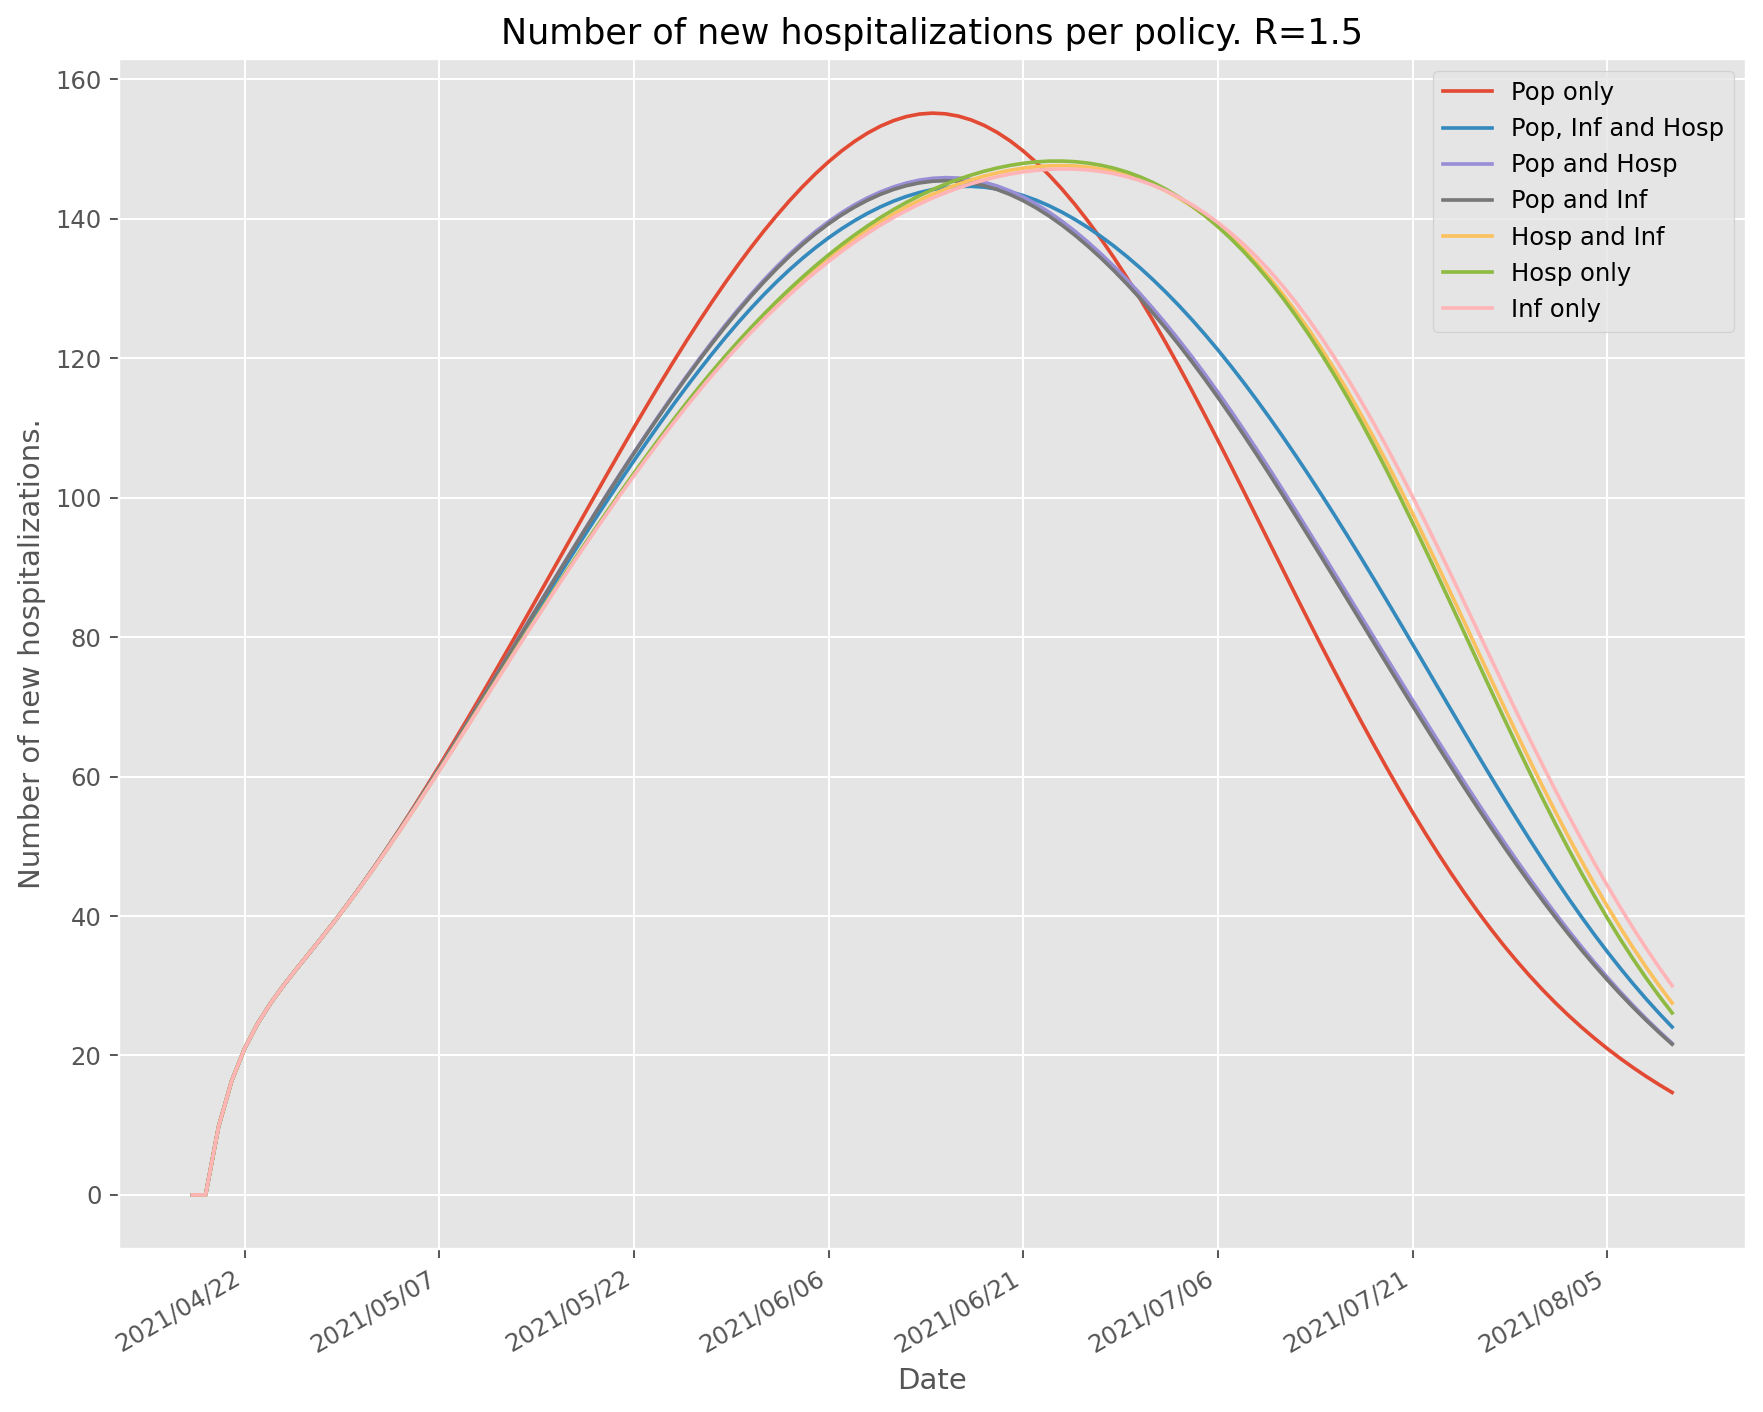

In [19]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='new hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 37128.16798893167
Pop and Inf: 38338.53802082201
Pop and Hosp: 38456.36227604859
Pop, Inf and Hosp: 39158.56793601489
Hosp and Inf: 41125.71636521024
Inf only: 41145.94555362666
Hosp only: 41171.60629889384


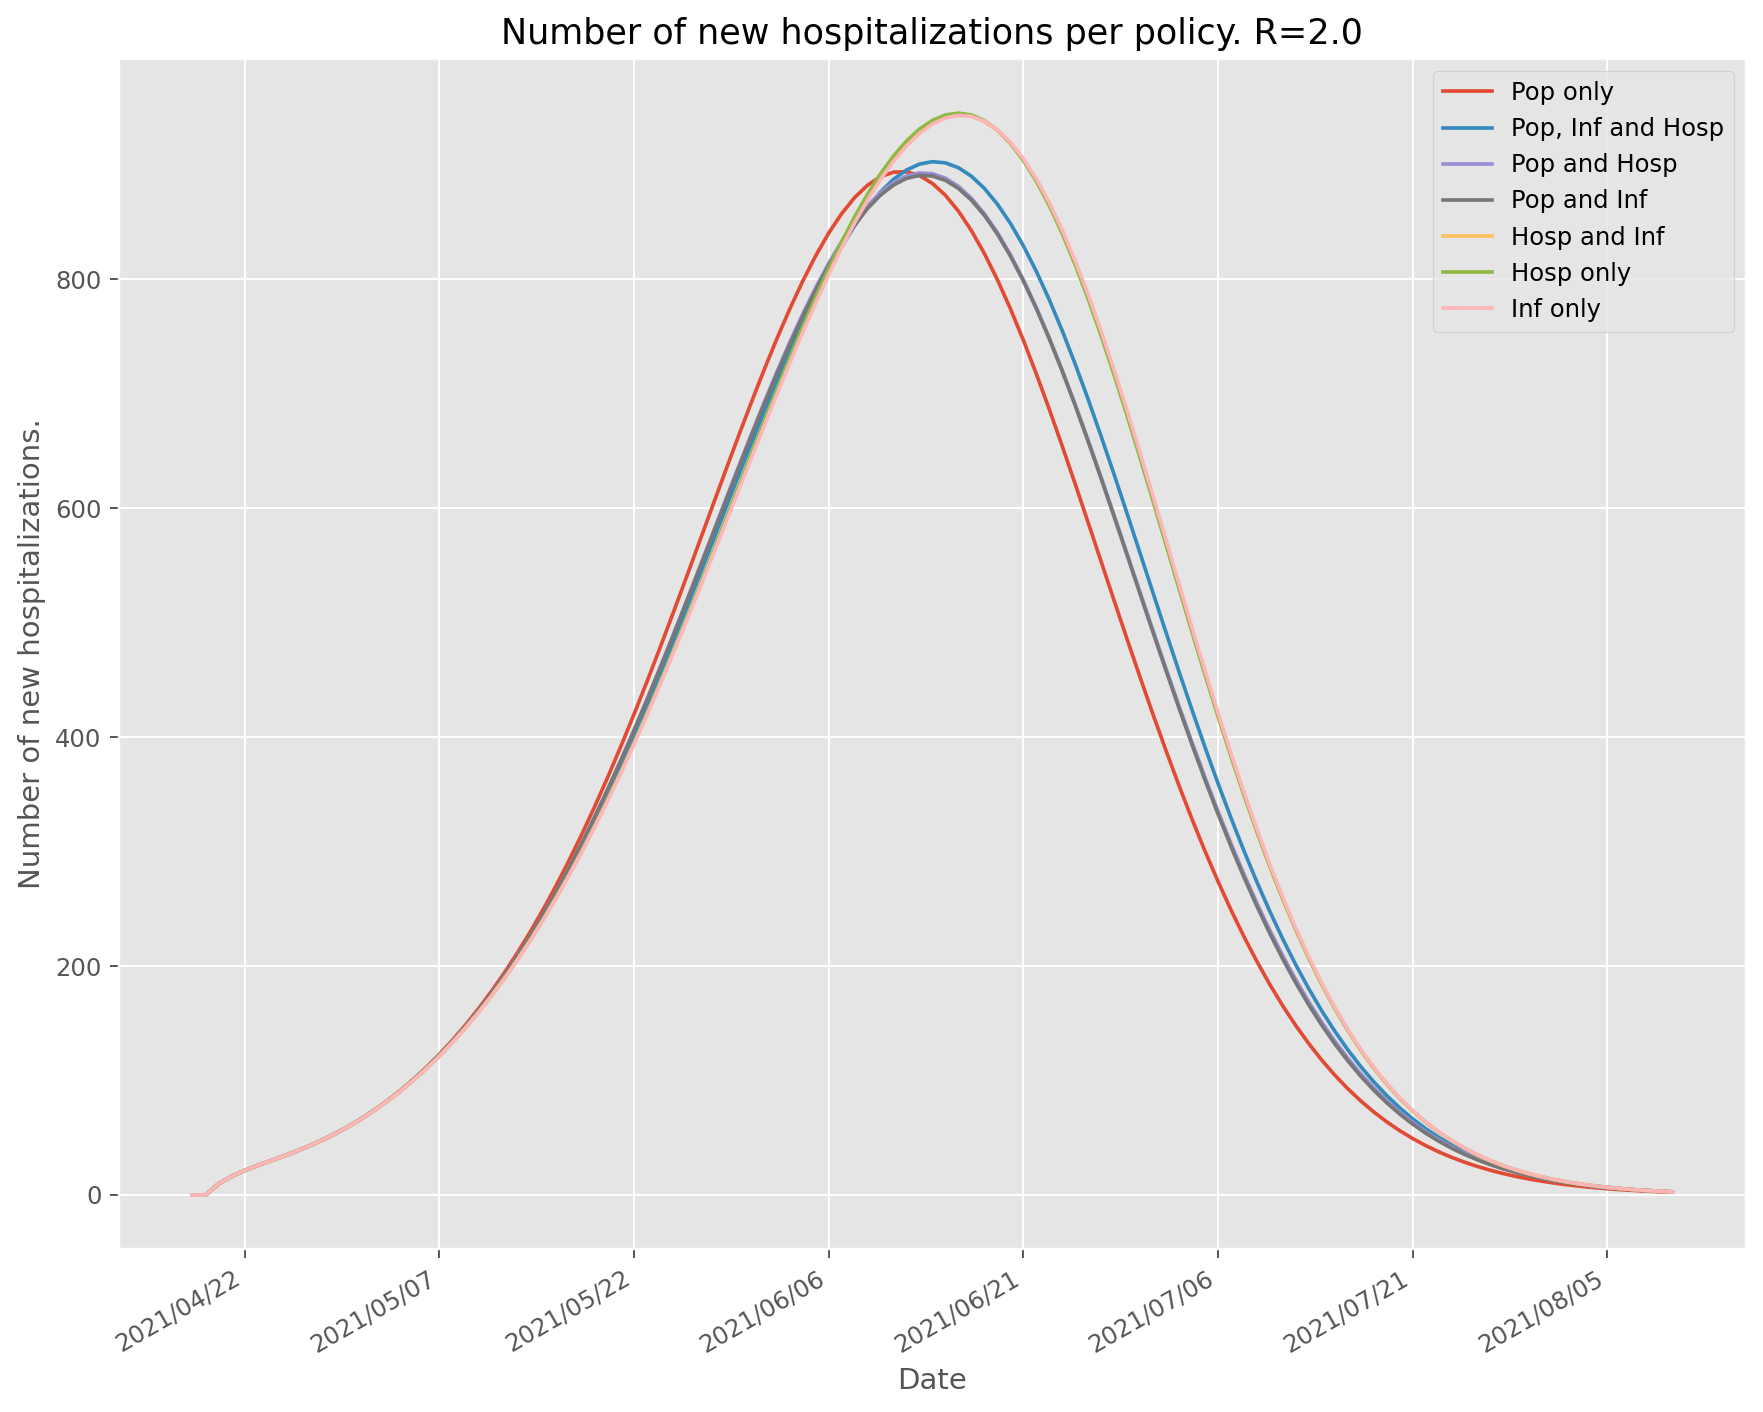

In [20]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='new hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

# Infections

Inf only: 189901.73544313997
Hosp and Inf: 190076.85172750315
Hosp only: 190256.04623094221
Pop, Inf and Hosp: 192109.3759291976
Pop and Inf: 193167.02673701243
Pop and Hosp: 193310.9314086927
Pop only: 197841.86417419417


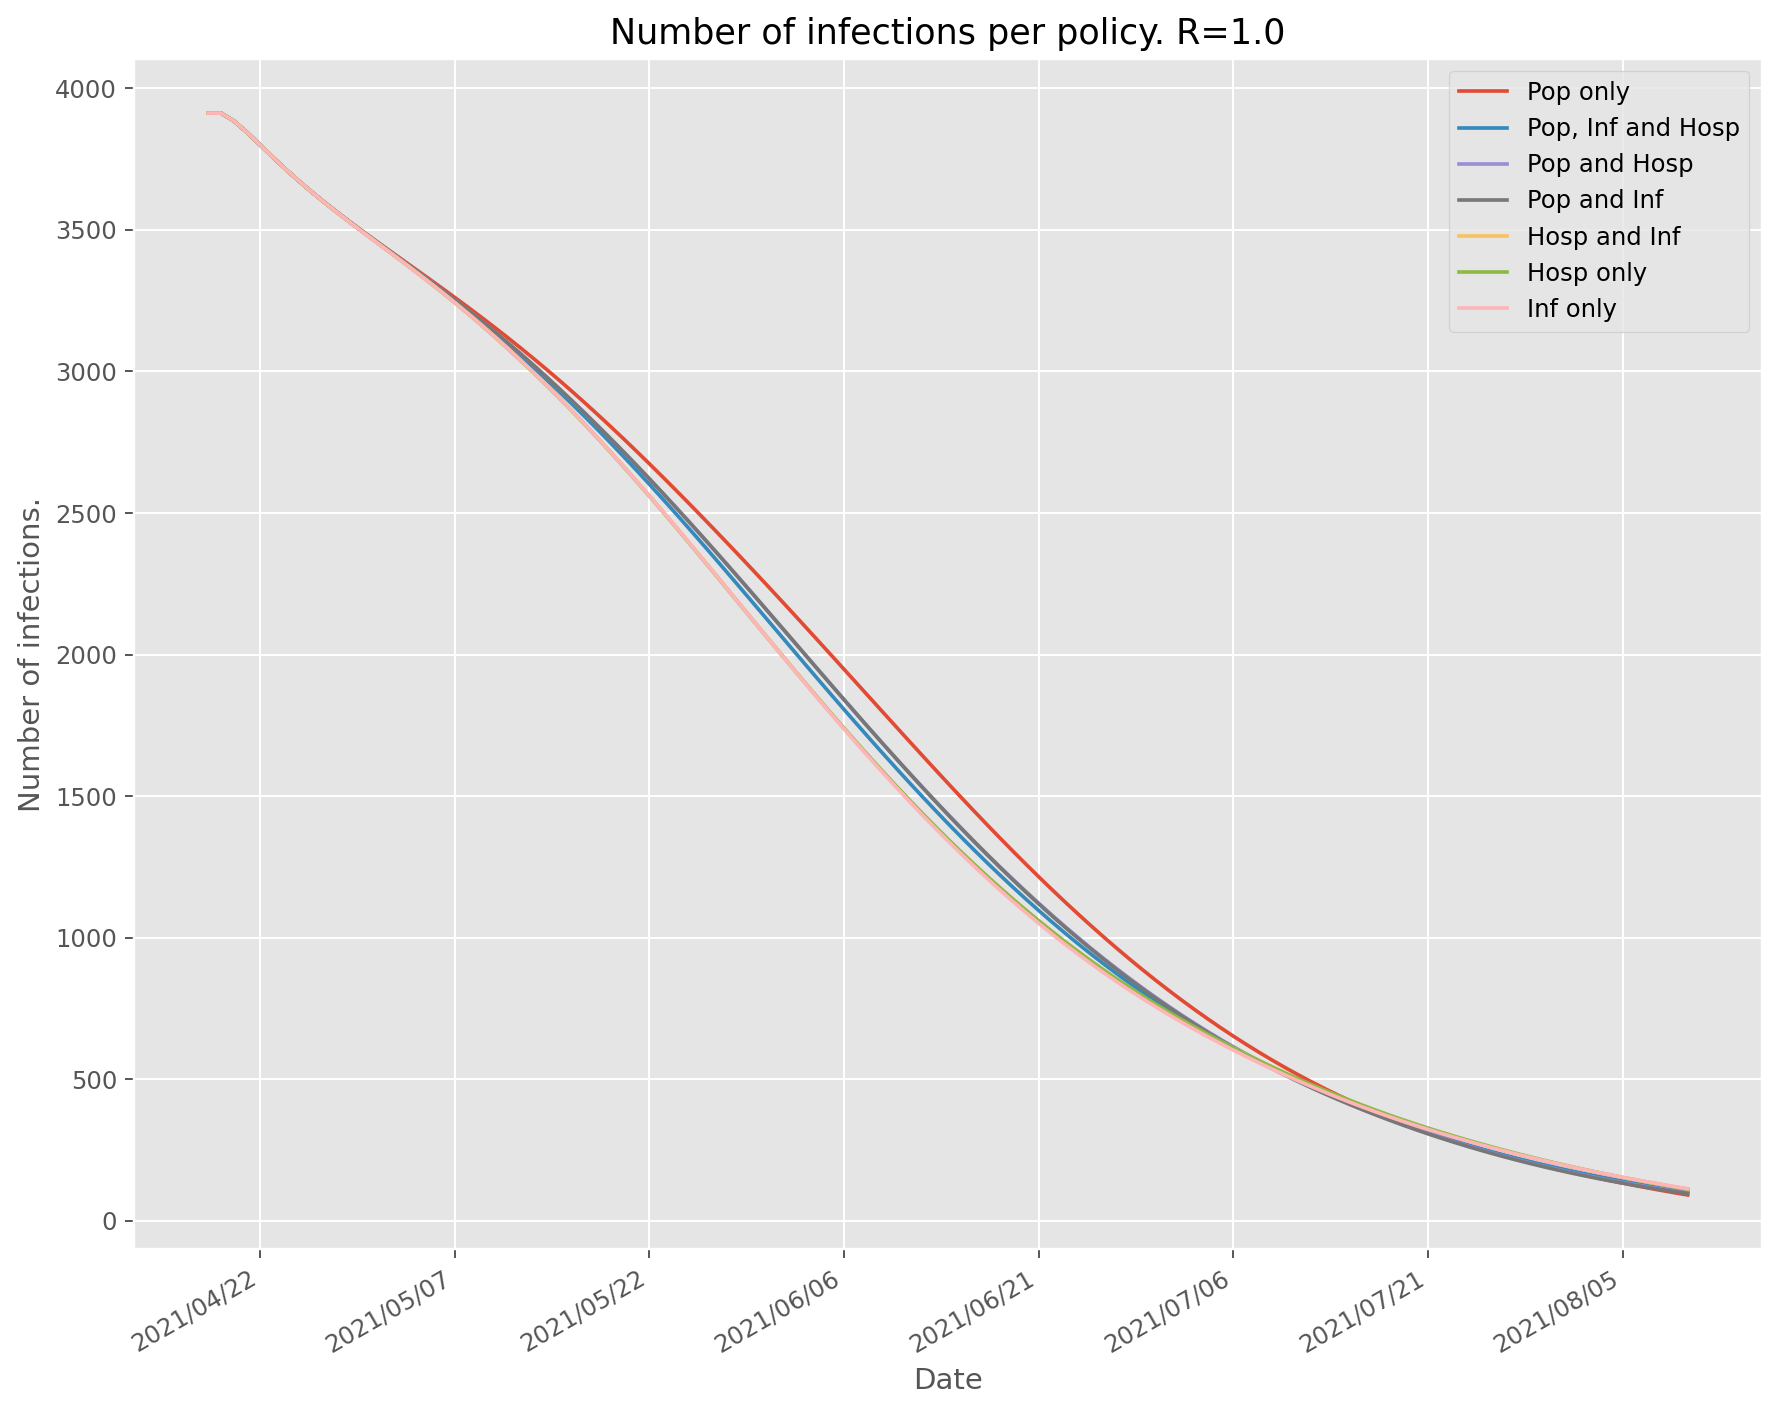

In [21]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='infections', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Inf only: 660575.7006537541
Hosp and Inf: 661472.793070358
Hosp only: 662732.5777675919
Pop, Inf and Hosp: 662809.203020362
Pop and Inf: 662896.9519383577
Pop and Hosp: 664703.1979389769
Pop only: 679215.1606227465


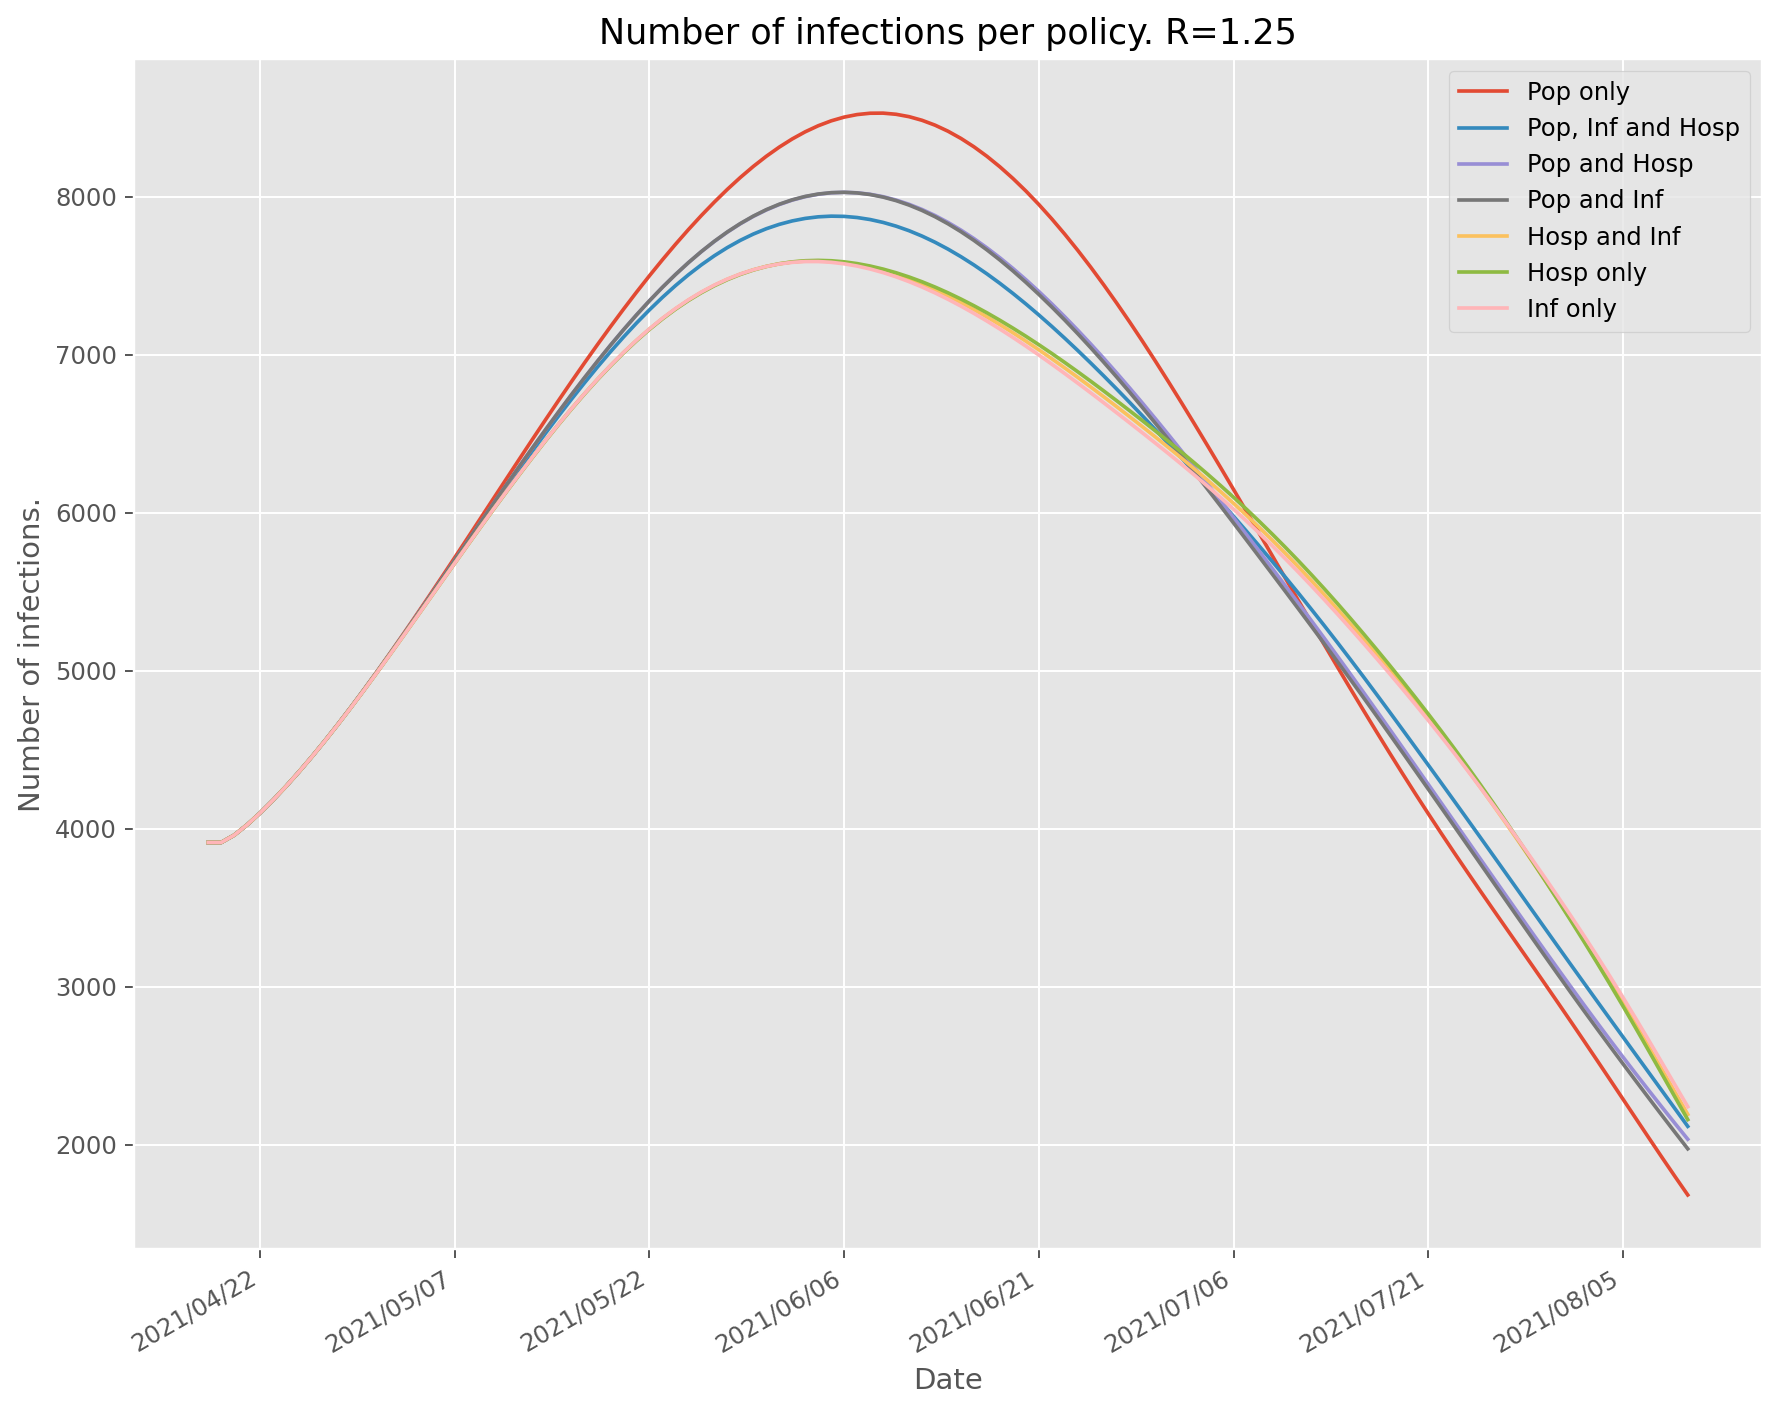

In [22]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='infections', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 2257103.2735595354
Pop and Inf: 2261037.6334774755
Pop and Hosp: 2268678.664579128
Pop, Inf and Hosp: 2276781.175517618
Hosp and Inf: 2294468.0011541606
Hosp only: 2295497.0031003184
Inf only: 2295974.300180118


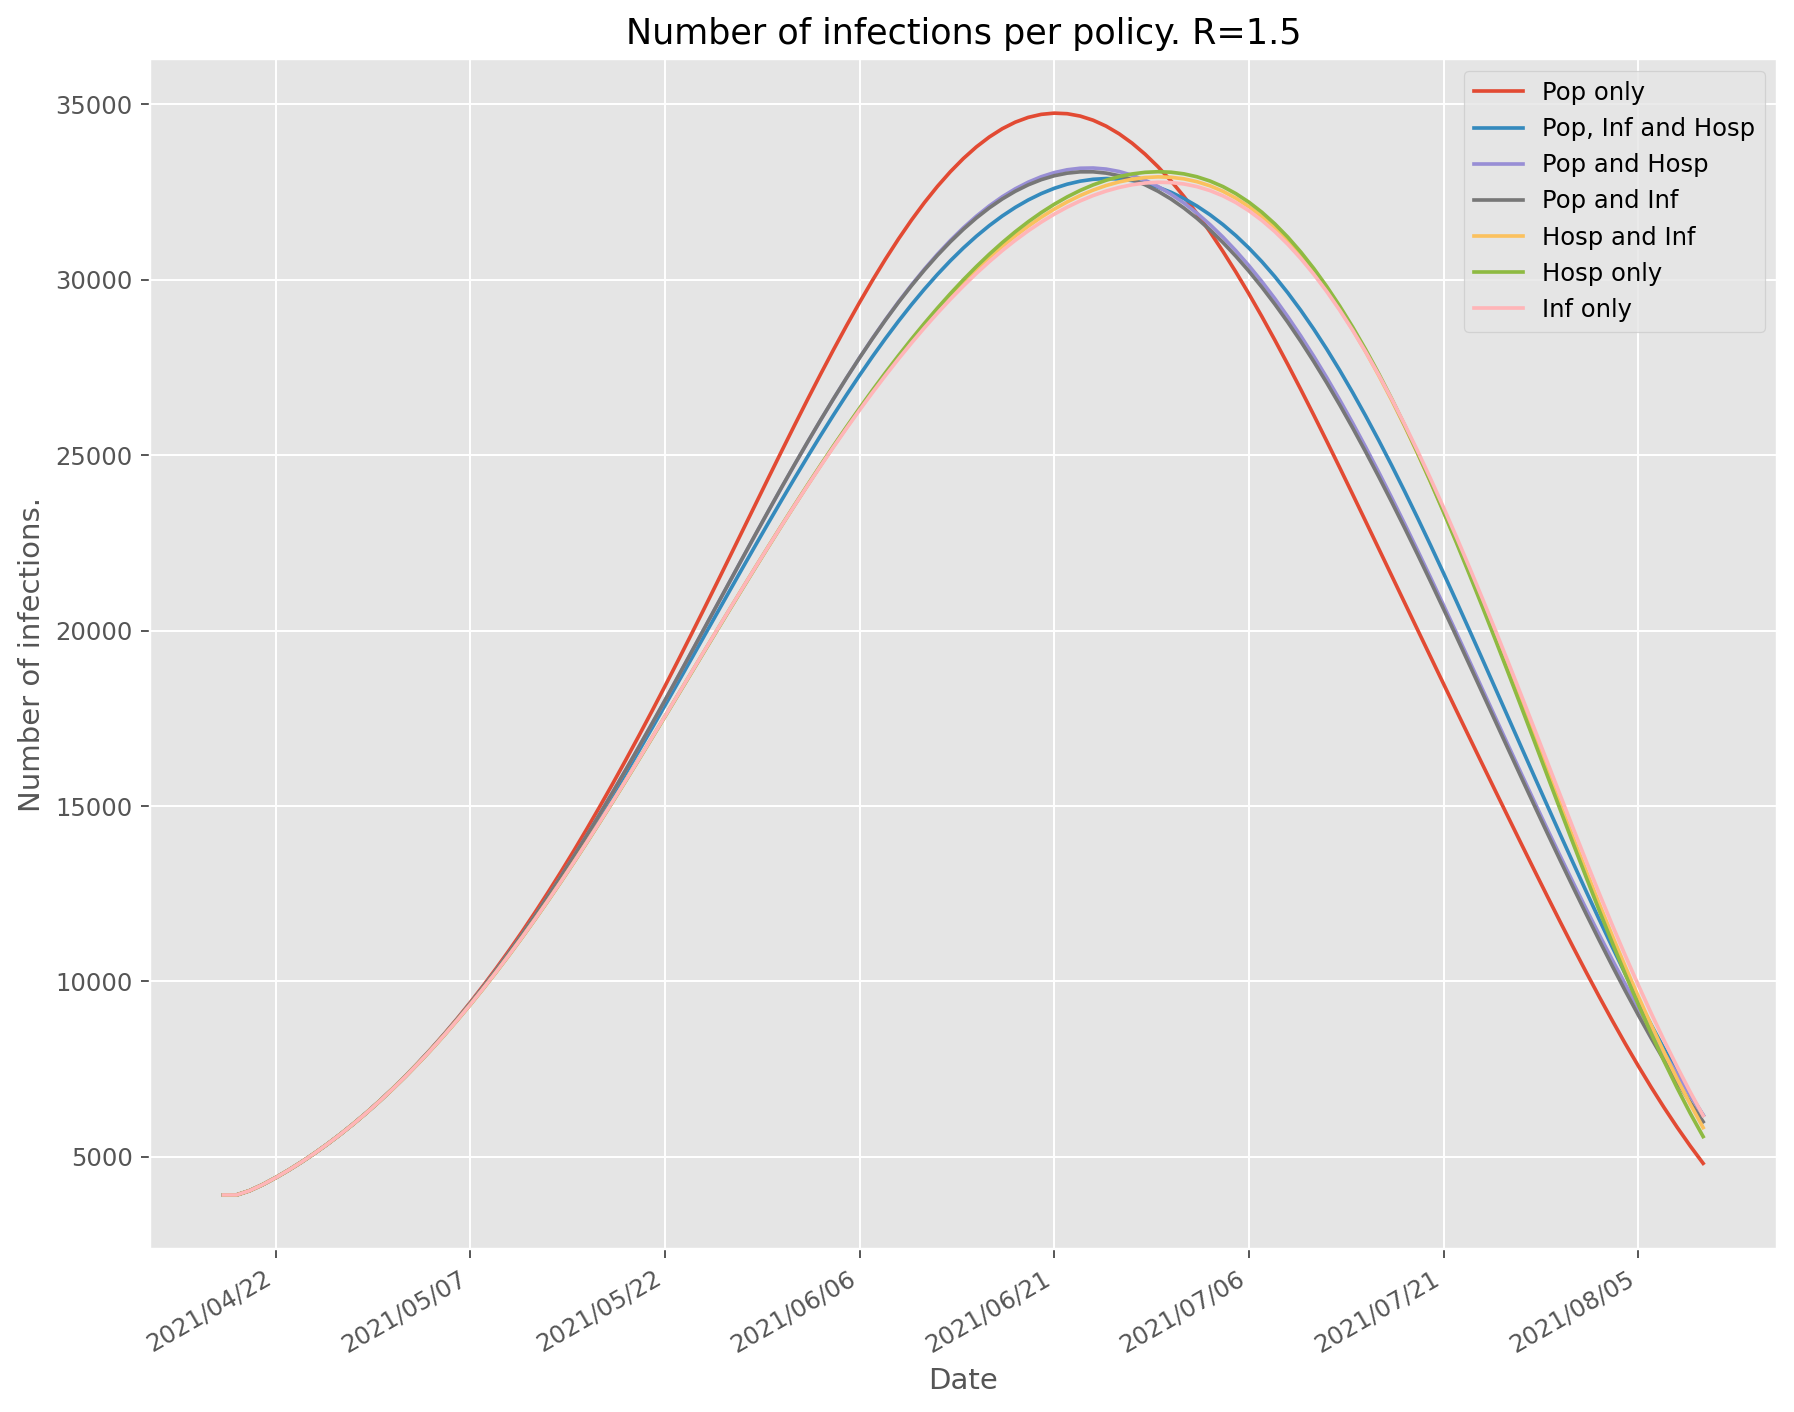

In [23]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='infections', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 6751971.898423682
Pop and Inf: 6790326.479278473
Pop and Hosp: 6800805.467889485
Pop, Inf and Hosp: 6806493.708721067
Inf only: 6807556.218890492
Hosp and Inf: 6813915.686758214
Hosp only: 6820885.873756303


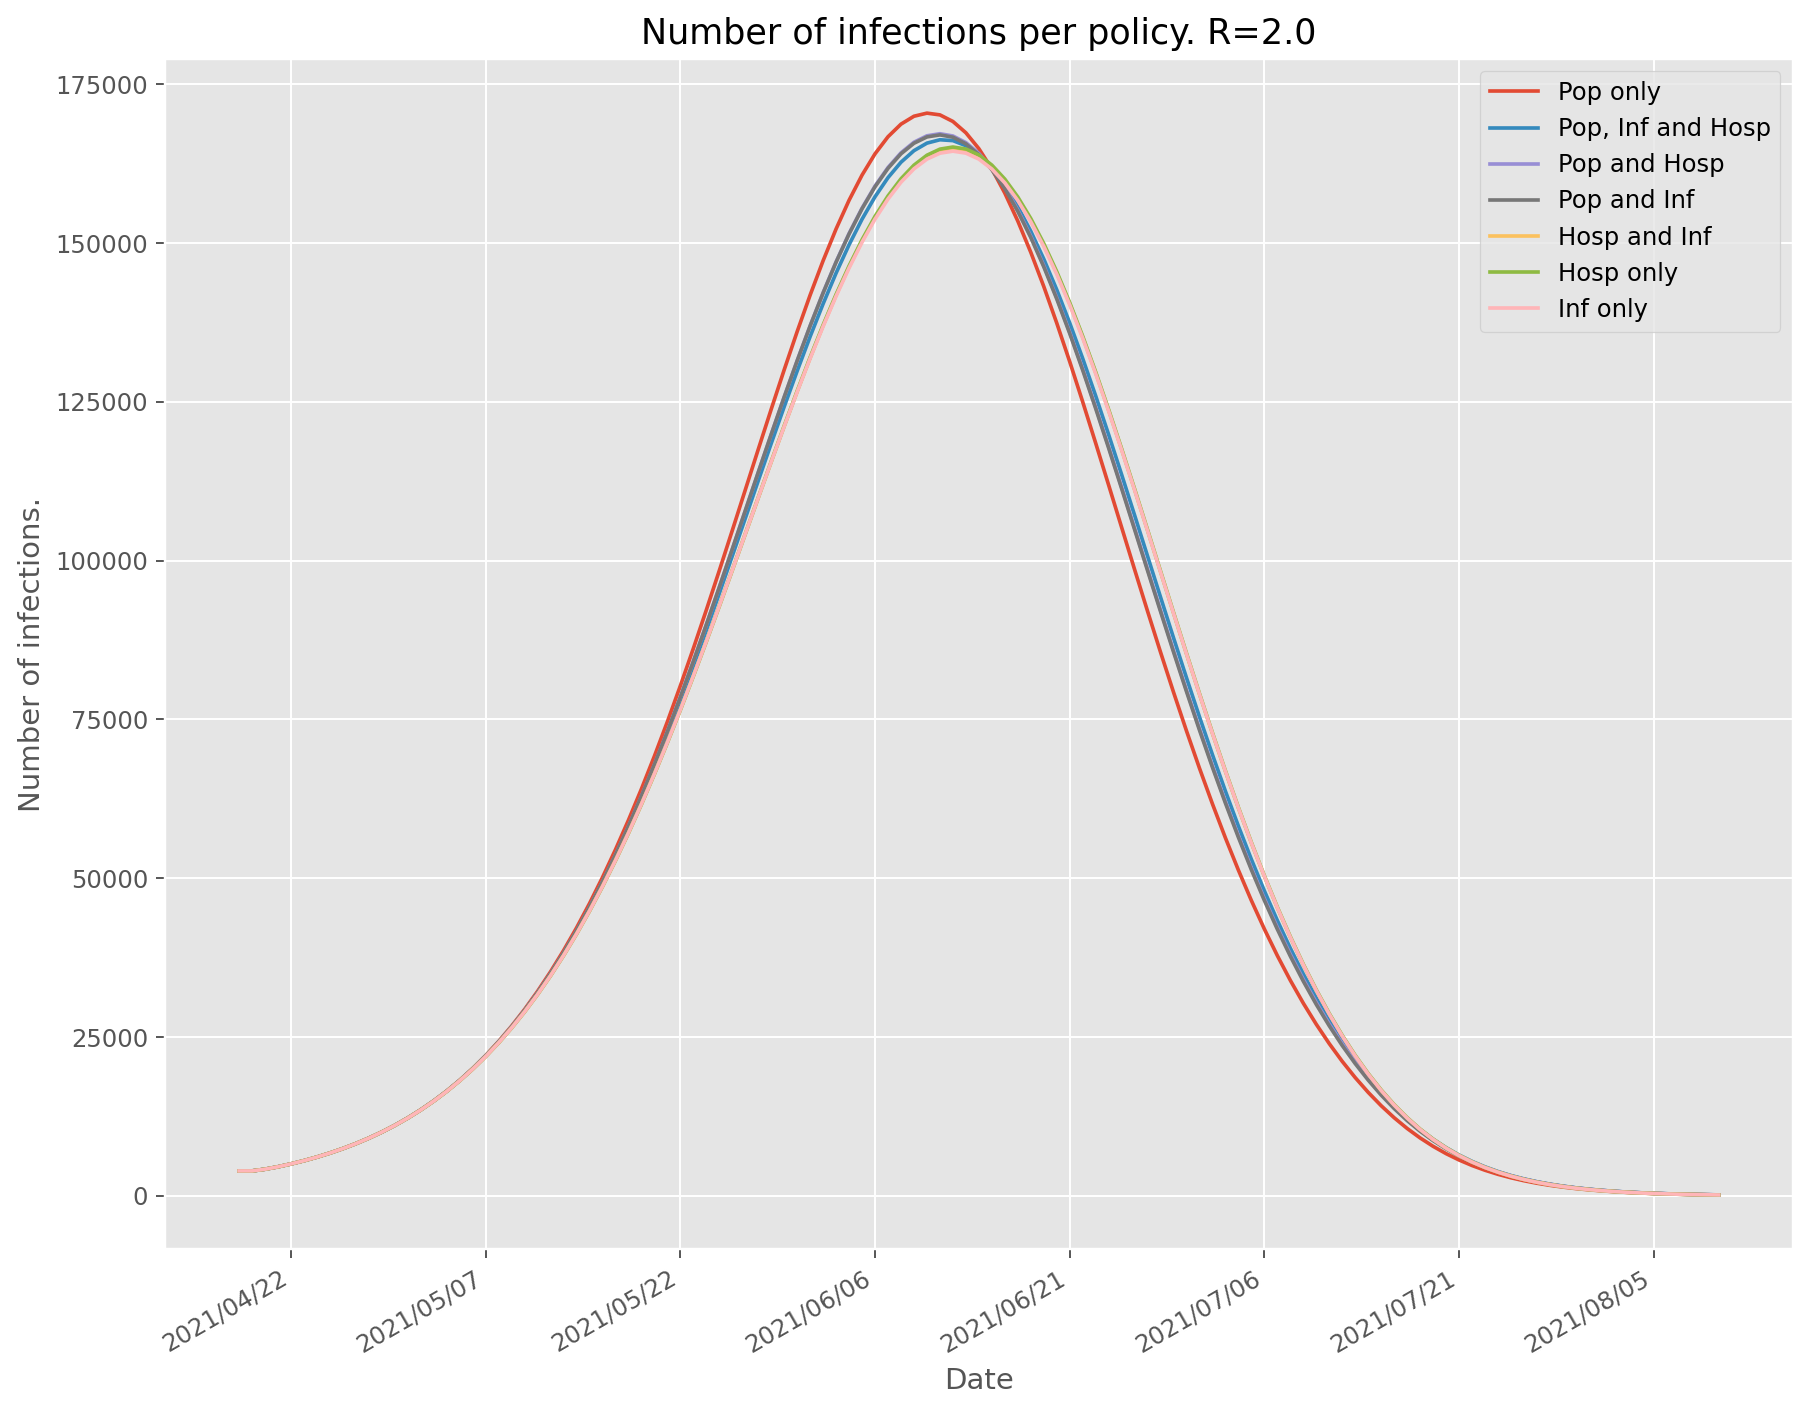

In [24]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='infections', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()